In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import dtale
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holt Winter's Exponential Smoothing

import scipy.stats as stats
import pylab

from numpy import isnan
from sklearn.impute import KNNImputer

In [ ]:
pip install dtale

In [63]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
###Load Data###

from google.colab import files
uploaded = files.upload()

In [64]:
import io
data = pd.read_csv(r"C:\Users\91984\Downloads\Pharma_Bounce_Rate.csv")
# Dataset is now stored in a Pandas Dataframe

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Typeofsales     29 non-null     object 
 1   Patient_ID      29 non-null     int64  
 2   Specialisation  29 non-null     object 
 3   Dept            29 non-null     object 
 4   Dateofbill      29 non-null     object 
 5   Quantity        29 non-null     int64  
 6   ReturnQuantity  29 non-null     int64  
 7   Final_Cost      29 non-null     float64
 8   Final_Sales     29 non-null     float64
 9   RtnMRP          29 non-null     float64
 10  Formulation     28 non-null     object 
 11  DrugName        25 non-null     object 
 12  SubCat          25 non-null     object 
 13  SubCat1         25 non-null     object 
dtypes: float64(3), int64(3), object(8)
memory usage: 3.3+ KB


In [4]:
data.describe().round(2)

,Patient_ID,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP
count,2.900000e+01,29.00,29.00,29.00,29.00,29.00
mean,1.201810e+10,2.17,0.38,149.03,364.02,18.70
std,1.632504e+04,3.73,1.52,244.14,800.43,65.89
min,1.201807e+10,0.00,0.00,40.34,0.00,0.00
25%,1.201808e+10,1.00,0.00,47.15,48.40,0.00
50%,1.201810e+10,1.00,0.00,49.96,81.10,0.00
75%,1.201811e+10,2.00,0.00,73.36,193.60,0.00
max,1.201812e+10,20.00,8.00,959.80,4004.21,330.29


In [66]:
"""##**Check for duplicates**"""

duplicate = data.duplicated()
duplicate

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
dtype: bool

In [6]:
#Check for null values
data.isnull().sum()

Typeofsales       0
Patient_ID        0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       1
DrugName          4
SubCat            4
SubCat1           4
dtype: int64

In [67]:
#Check for shape
data.shape

(29, 14)

In [68]:
#Imputation by Mode for the critical columns
data['DrugName'] = data['DrugName'].fillna(data['DrugName'].mode()[0])

In [69]:
data.isnull().sum()

Typeofsales       0
Patient_ID        0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       1
DrugName          0
SubCat            4
SubCat1           4
dtype: int64

In [70]:
"""##**Converting the datatype of Date column from Object to Datetime format**"""

data['Dateofbill'] = pd.to_datetime(data['Dateofbill'])

#Sorting the date column
#data = data.sort_values(by='Quantity')

In [71]:
data

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,12018098765,Specialisation6,Department1,2022-06-01,1,0,55.406,59.260,0.000,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS
1,Sale,12018103897,Specialisation7,Department1,2022-07-23,1,0,768.638,950.800,0.000,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES
2,Sale,12018101123,Specialisation2,Department3,2022-06-23,1,0,774.266,4004.214,0.000,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
3,Sale,12018079281,Specialisation40,Department1,2022-03-17,2,0,40.798,81.044,0.000,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
4,Sale,12018117928,Specialisation5,Department1,2022-12-21,1,0,40.434,40.504,0.000,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM
5,Return,12018103662,Specialisation2,Department1,2022-07-15,0,8,47.902,0.000,330.288,Form1,SALBUTAMOL 2.5MG,INHALERS & RESPULES,RESPIRATORY SYSTEM
6,Sale,12018097585,Specialisation2,Department1,2022-05-22,1,0,41.862,42.218,0.000,Form1,FUROSEMIDE 10MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
7,Sale,12018077721,Specialisation4,Department1,2022-01-12,3,0,60.026,142.752,0.000,Form1,SODIUM CHLORIDE IVF 100ML,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
8,Sale,12018096500,Specialisation4,Department2,2022-08-24,2,0,49.856,94.000,0.000,Form2,SODIUM BICARBONATE 8.5% INJ,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
9,Sale,12018071649,Specialisation4,Department1,2022-08-31,1,0,258.860,319.800,0.000,Form1,PEPTIDE BASED DIET POWDER,NUTRITIONAL SUPPLEMENTS,NUTRITION


In [72]:
data.sort_values(by='Quantity')

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
5,Return,12018103662,Specialisation2,Department1,2022-07-15,0,8,47.902,0.000,330.288,Form1,SALBUTAMOL 2.5MG,INHALERS & RESPULES,RESPIRATORY SYSTEM
21,Return,12018109493,Specialisation5,Department1,2022-09-17,0,1,64.864,0.000,96.800,NaN,MULTIPLE ELECTROLYTES 500ML IVF,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
18,Return,12018122962,Specialisation54,Department1,2022-12-19,0,2,70.016,0.000,115.132,Form2,SODIUM CHLORIDE 0.9%,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
0,Sale,12018098765,Specialisation6,Department1,2022-06-01,1,0,55.406,59.260,0.000,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS
26,Sale,12018086960,Specialisation4,Department1,2022-03-19,1,0,45.152,47.100,0.000,Form1,LIGNOCAINE HYDROCHLORIDE 2% INJ,"OINTMENTS, CREAMS & GELS",ANAESTHETICS
25,Sale,12018102716,Specialisation14,Department1,2022-07-07,1,0,48.736,160.510,0.000,Form1,PARACETAMOL 1GM IV INJ,INJECTIONS,CENTRAL NERVOUS SYSTEM
23,Sale,12018116917,Specialisation25,Department1,2022-11-07,1,0,49.956,62.800,0.000,Form1,MULTIPLE ELECTROLYTES 500ML IVF,NaN,NaN
22,Sale,12018066085,Specialisation5,Department1,2022-08-11,1,0,47.146,48.400,0.000,Form1,SODIUM CHLORIDE IVF 100ML,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
20,Sale,12018119427,Specialisation14,Department1,2022-12-09,1,0,48.736,160.510,0.000,Form1,PARACETAMOL 1GM IV INJ,INJECTIONS,CENTRAL NERVOUS SYSTEM
16,Sale,12018111286,Specialisation25,Department1,2022-09-07,1,0,49.352,60.800,0.000,Form1,MULTIPLE ELECTROLYTES 500ML IVF,NaN,NaN


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Typeofsales     29 non-null     object        
 1   Patient_ID      29 non-null     int64         
 2   Specialisation  29 non-null     object        
 3   Dept            29 non-null     object        
 4   Dateofbill      29 non-null     datetime64[ns]
 5   Quantity        29 non-null     int64         
 6   ReturnQuantity  29 non-null     int64         
 7   Final_Cost      29 non-null     float64       
 8   Final_Sales     29 non-null     float64       
 9   RtnMRP          29 non-null     float64       
 10  Formulation     28 non-null     object        
 11  DrugName        29 non-null     object        
 12  SubCat          25 non-null     object        
 13  SubCat1         25 non-null     object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory

In [74]:
data.shape

(29, 14)

In [75]:
data

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,12018098765,Specialisation6,Department1,2022-06-01,1,0,55.406,59.260,0.000,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS
1,Sale,12018103897,Specialisation7,Department1,2022-07-23,1,0,768.638,950.800,0.000,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES
2,Sale,12018101123,Specialisation2,Department3,2022-06-23,1,0,774.266,4004.214,0.000,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
3,Sale,12018079281,Specialisation40,Department1,2022-03-17,2,0,40.798,81.044,0.000,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
4,Sale,12018117928,Specialisation5,Department1,2022-12-21,1,0,40.434,40.504,0.000,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM
5,Return,12018103662,Specialisation2,Department1,2022-07-15,0,8,47.902,0.000,330.288,Form1,SALBUTAMOL 2.5MG,INHALERS & RESPULES,RESPIRATORY SYSTEM
6,Sale,12018097585,Specialisation2,Department1,2022-05-22,1,0,41.862,42.218,0.000,Form1,FUROSEMIDE 10MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
7,Sale,12018077721,Specialisation4,Department1,2022-01-12,3,0,60.026,142.752,0.000,Form1,SODIUM CHLORIDE IVF 100ML,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
8,Sale,12018096500,Specialisation4,Department2,2022-08-24,2,0,49.856,94.000,0.000,Form2,SODIUM BICARBONATE 8.5% INJ,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
9,Sale,12018071649,Specialisation4,Department1,2022-08-31,1,0,258.860,319.800,0.000,Form1,PEPTIDE BASED DIET POWDER,NUTRITIONAL SUPPLEMENTS,NUTRITION


In [ ]:
#autoeda
d = dtale.show(data)
d

In [76]:
# dropping Typeofsales and Patient_ID, since it is not required
data = data.drop(["Typeofsales", "Patient_ID"], axis =1)

In [77]:
data.shape

(29, 12)

In [ ]:
#data['DrugName'].value_counts().head(10).plot(kind = 'bar')

In [78]:
data = data[["Dateofbill","Quantity", "DrugName"]]

In [79]:
data.shape

(29, 3)

In [14]:
unique = data["DrugName"].value_counts()
unique

MULTIPLE ELECTROLYTES 500ML IVF                              7
PARACETAMOL 1GM IV INJ                                       2
SODIUM CHLORIDE 0.9%                                         2
SODIUM CHLORIDE IVF 100ML                                    2
N-ACETYLCYSTEINE 1000MG/5ML INJ                              1
POLYANTIBIOTIC RESISTANT BACILLUS CLAUSII 2BILLION SPORES    1
LIGNOCAINE HYDROCHLORIDE 2% INJ                              1
VITAMIN K 1ML INJ                                            1
PARACETAMOL 150MG                                            1
PROPOFOL 1% 20ML INJ                                         1
ZINC ACETATE 20MG/5ML SYP                                    1
CEFTAZIDIME 2GM+AVIBACTAM 500MG                              1
PEPTIDE BASED DIET POWDER                                    1
SODIUM BICARBONATE 8.5% INJ                                  1
FUROSEMIDE 10MG/ML                                           1
SALBUTAMOL 2.5MG                                       

In [80]:
data.sort_values(by='Quantity',ascending = False)

,Dateofbill,Quantity,DrugName
11,2022-04-02,20,N-ACETYLCYSTEINE 1000MG/5ML INJ
13,2022-08-20,8,PARACETAMOL 150MG
10,2022-10-04,3,MULTIPLE ELECTROLYTES 500ML IVF
24,2022-02-13,3,SODIUM CHLORIDE 0.9%
7,2022-01-12,3,SODIUM CHLORIDE IVF 100ML
8,2022-08-24,2,SODIUM BICARBONATE 8.5% INJ
17,2022-09-17,2,MULTIPLE ELECTROLYTES 500ML IVF
15,2022-11-26,2,MULTIPLE ELECTROLYTES 500ML IVF
19,2022-10-14,2,MULTIPLE ELECTROLYTES 500ML IVF
3,2022-03-17,2,WATER FOR INJECTION 10ML SOLUTION


In [81]:
# Making new Index
data = data.set_index('Dateofbill')
data.index = pd.to_datetime(data.index)
grouped_data = data.groupby('DrugName')

In [82]:
data

,Quantity,DrugName
Dateofbill,,
2022-06-01,1,ZINC ACETATE 20MG/5ML SYP
2022-07-23,1,CEFTAZIDIME 2GM+AVIBACTAM 500MG
2022-06-23,1,EPTIFIBATIDE 0.75MG/ML
2022-03-17,2,WATER FOR INJECTION 10ML SOLUTION
2022-12-21,1,LORAZEPAM 1MG
2022-07-15,0,SALBUTAMOL 2.5MG
2022-05-22,1,FUROSEMIDE 10MG/ML
2022-01-12,3,SODIUM CHLORIDE IVF 100ML
2022-08-24,2,SODIUM BICARBONATE 8.5% INJ


In [83]:
grouped_data

In [84]:
# Forecasting For Top 5 drugs (Only 4 possible)

A = grouped_data.get_group('MULTIPLE ELECTROLYTES 500ML IVF')
A1 = grouped_data.get_group('SODIUM CHLORIDE 0.9%')
A2 = grouped_data.get_group('SODIUM CHLORIDE IVF 100ML')
A3 = grouped_data.get_group('PARACETAMOL 1GM IV INJ')
A4 = grouped_data.get_group('N-ACETYLCYSTEINE 1000MG/5ML INJ')


In [85]:
A

,Quantity,DrugName
Dateofbill,,
2022-10-04,3,MULTIPLE ELECTROLYTES 500ML IVF
2022-11-26,2,MULTIPLE ELECTROLYTES 500ML IVF
2022-09-07,1,MULTIPLE ELECTROLYTES 500ML IVF
2022-09-17,2,MULTIPLE ELECTROLYTES 500ML IVF
2022-10-14,2,MULTIPLE ELECTROLYTES 500ML IVF
2022-09-17,0,MULTIPLE ELECTROLYTES 500ML IVF
2022-11-07,1,MULTIPLE ELECTROLYTES 500ML IVF


<Axes: xlabel='Dateofbill'>

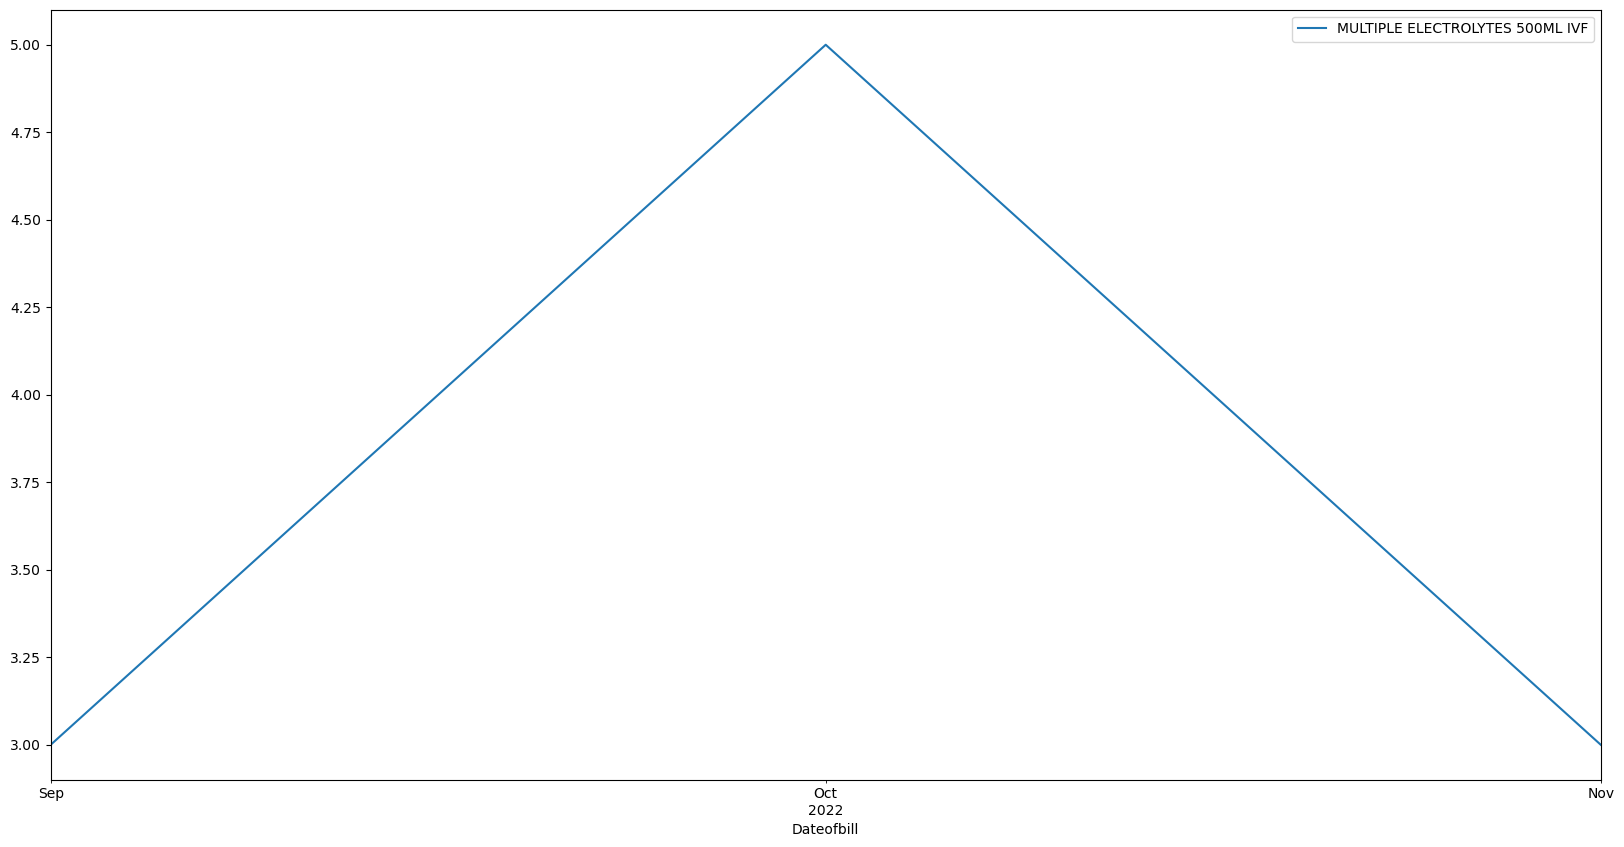

In [86]:
A = A[["Quantity"]]
A.rename(columns = {"Quantity" : "MULTIPLE ELECTROLYTES 500ML IVF"}, inplace=True)
A = A.resample('M').sum()
A.plot()

In [87]:
A1

,Quantity,DrugName
Dateofbill,,
2022-12-19,0,SODIUM CHLORIDE 0.9%
2022-02-13,3,SODIUM CHLORIDE 0.9%


<Axes: xlabel='Dateofbill'>

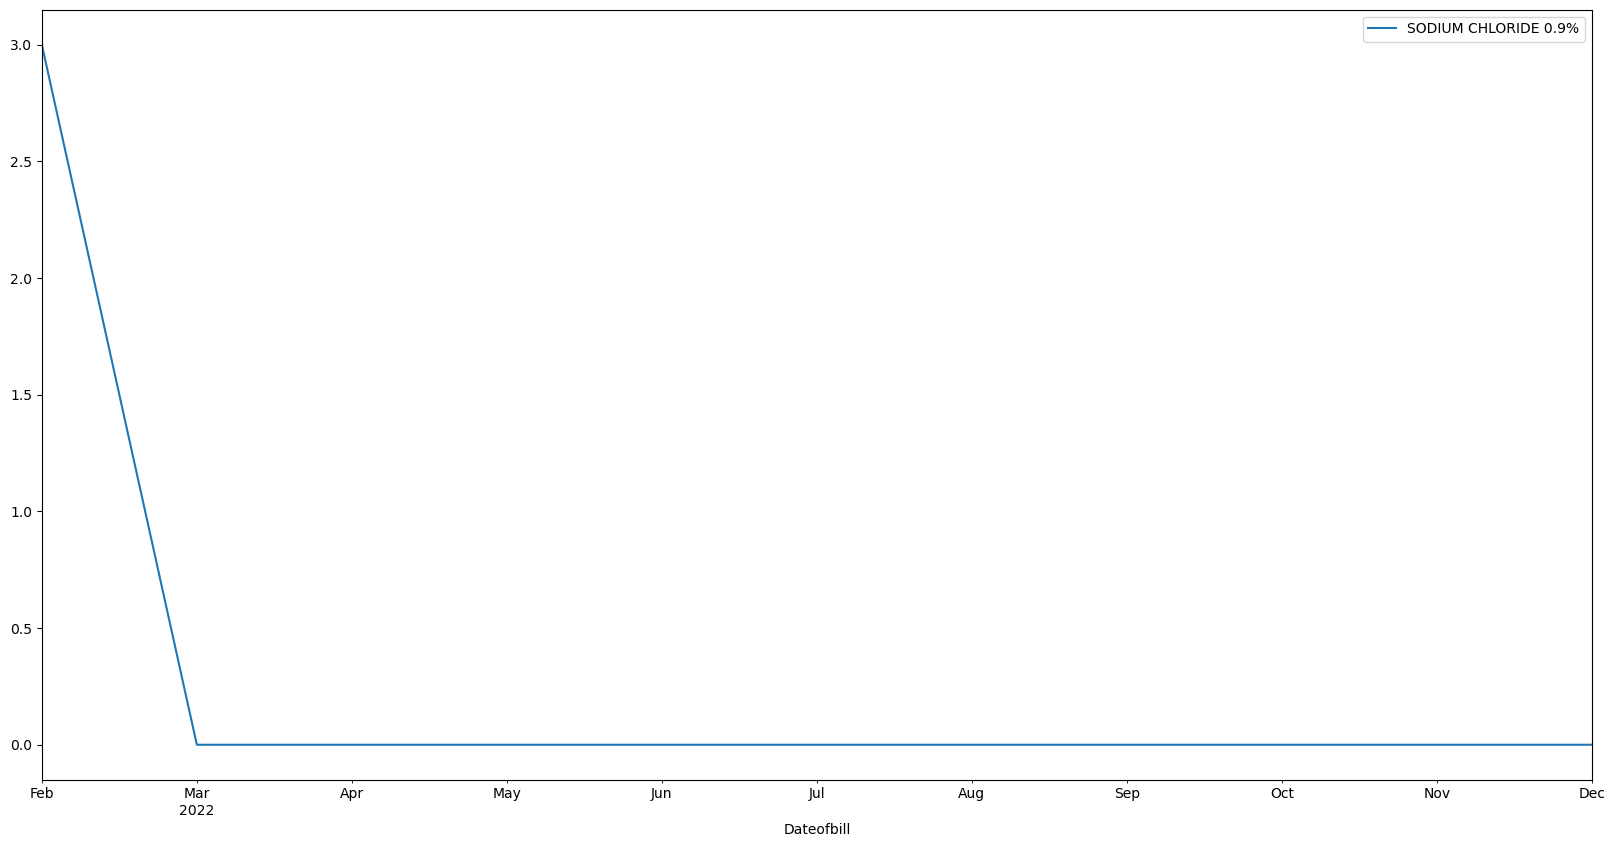

In [88]:
A1 = A1[["Quantity"]]
A1.rename(columns = {"Quantity" : "SODIUM CHLORIDE 0.9%"}, inplace=True)
A1 = A1.resample('M').sum()
A1.plot()

In [89]:
A2

,Quantity,DrugName
Dateofbill,,
2022-01-12,3,SODIUM CHLORIDE IVF 100ML
2022-08-11,1,SODIUM CHLORIDE IVF 100ML


<Axes: xlabel='Dateofbill'>

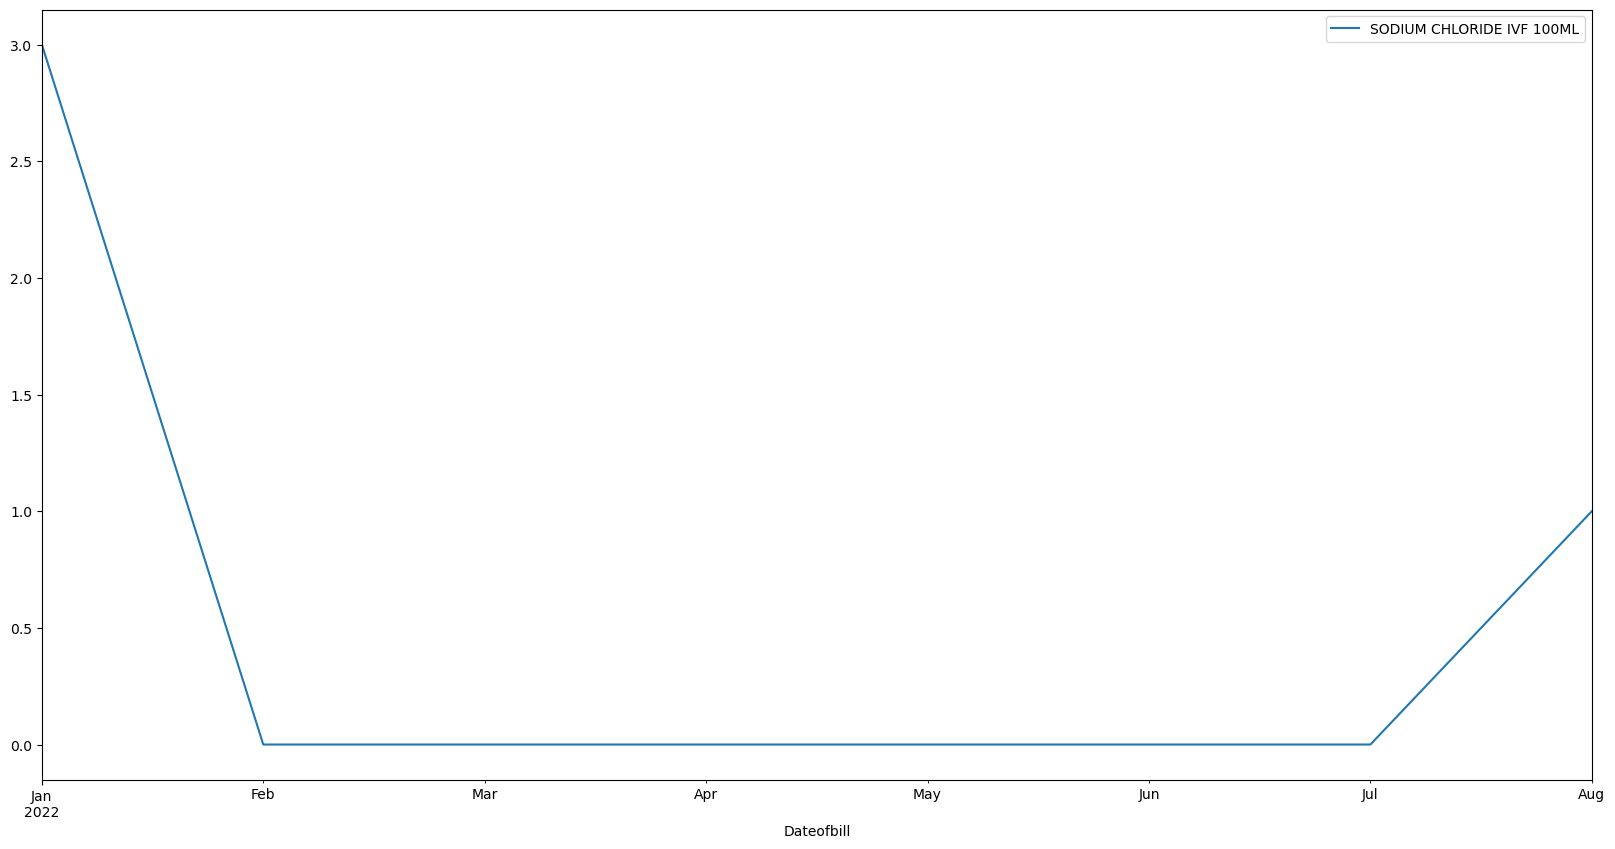

In [90]:
A2 = A2[["Quantity"]]
A2.rename(columns = {"Quantity" : "SODIUM CHLORIDE IVF 100ML"}, inplace=True)
A2 = A2.resample('M').sum()
A2.plot()

In [91]:
A3

,Quantity,DrugName
Dateofbill,,
2022-12-09,1,PARACETAMOL 1GM IV INJ
2022-07-07,1,PARACETAMOL 1GM IV INJ


<Axes: xlabel='Dateofbill'>

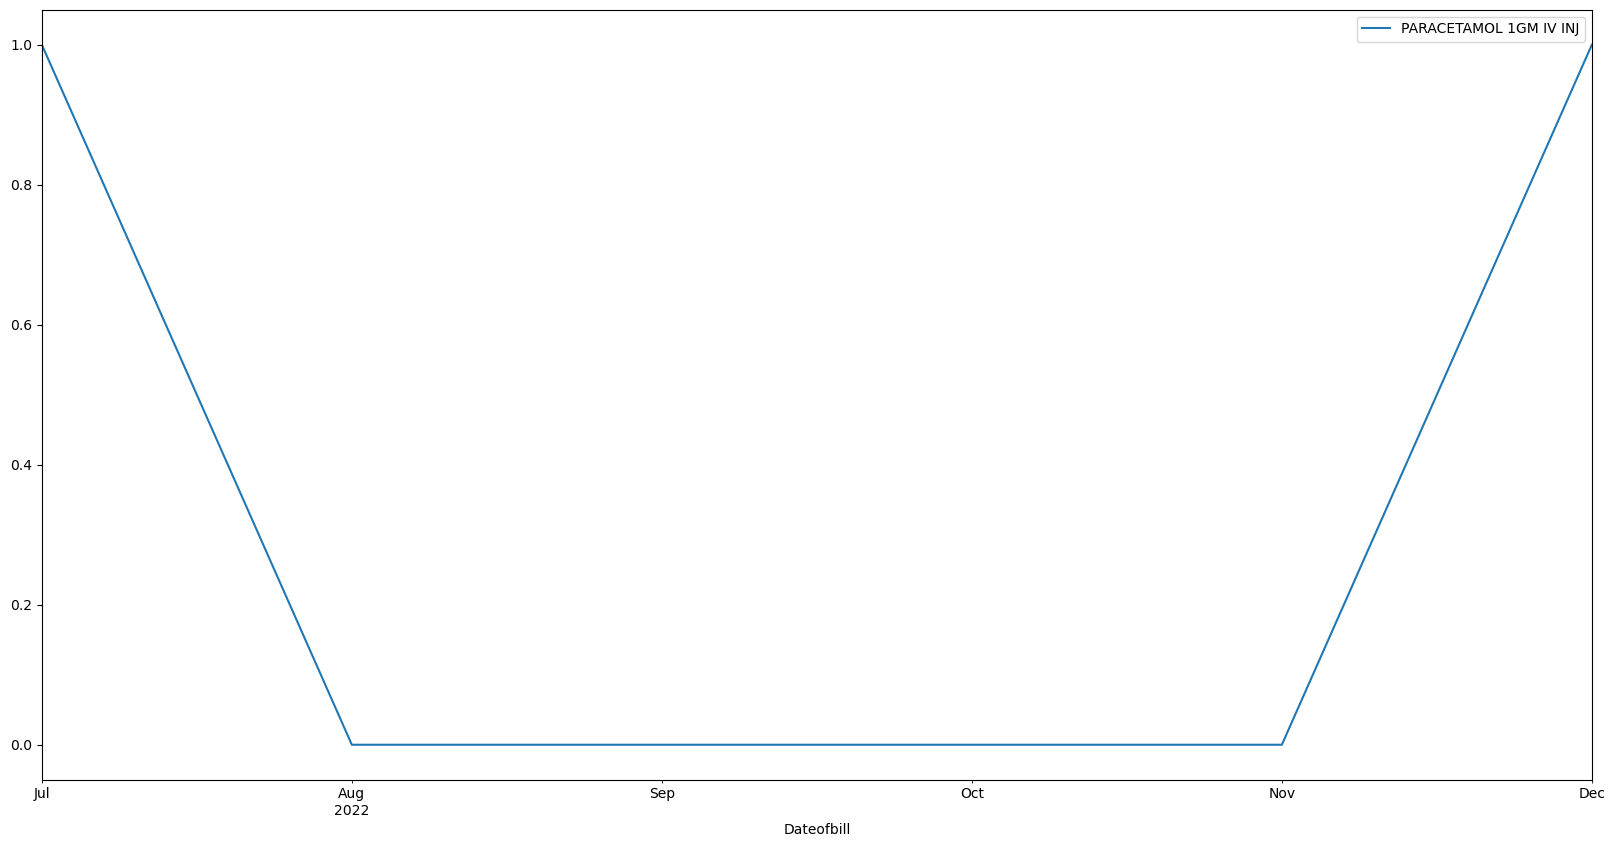

In [92]:

A3 = A3[["Quantity"]]
A3.rename(columns = {"Quantity" : "PARACETAMOL 1GM IV INJ"}, inplace=True)
A3 = A3.resample('M').sum()
A3.plot()


In [93]:
A4

,Quantity,DrugName
Dateofbill,,
2022-04-02,20,N-ACETYLCYSTEINE 1000MG/5ML INJ


<Axes: xlabel='Dateofbill'>

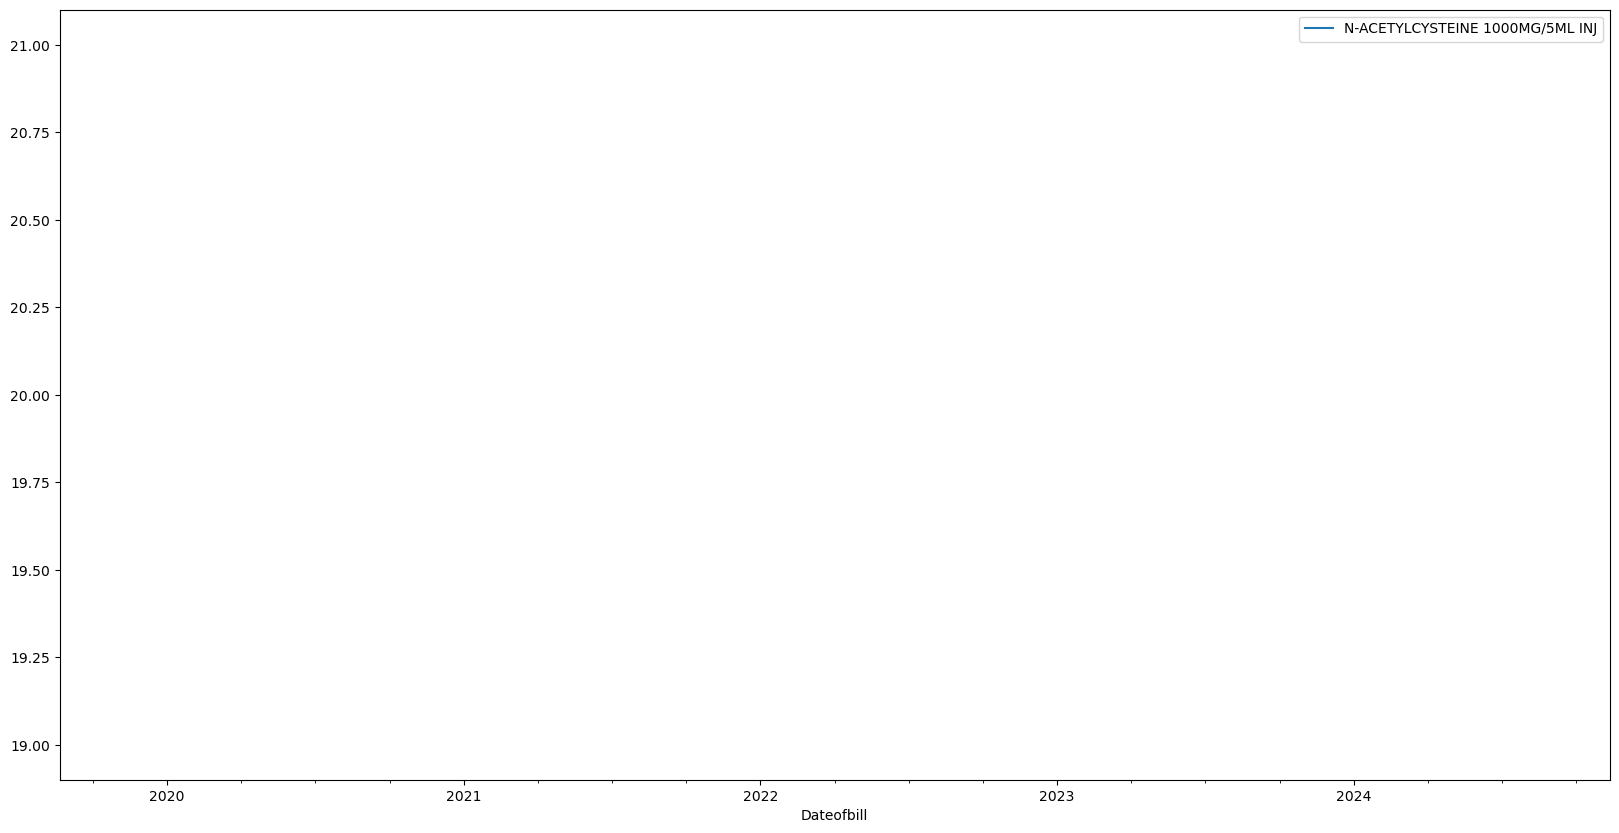

In [94]:
A4 = A4[["Quantity"]]
A4.rename(columns = {"Quantity" : "N-ACETYLCYSTEINE 1000MG/5ML INJ"}, inplace=True)
A4 = A4.resample('M').sum()
A4.plot()

In [95]:
from statsmodels.tsa.stattools import adfuller

In [96]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [97]:
adf_test(A)

ValueError: sample size is too short to use selected regression component

In [98]:
adf_test(A1)

ADF Statistics: -3.2225135712778084e+16
p- value: 0.0
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [99]:
adf_test(A2)

ADF Statistics: -7.181324987175316
p- value: 2.645211058164923e-10
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [100]:
adf_test(A3)

ADF Statistics: -2.23606797749979
p- value: 0.19341617825473173
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [101]:
adf_test(A4)

ValueError: Invalid input, x is constant

In [102]:
def decompose(df):
    """
    A function that returns the trend, seasonality and residual captured by applying both multiplicative and
    additive model.
    df -> DataFrame
    column_name -> column_name for which trend, seasonality is to be captured
    """
    # result_mul = seasonal_decompose(df, model='multiplicative', extrapolate_trend = 'freq',  period=1)
    result_add = seasonal_decompose(df, model = 'additive', extrapolate_trend='freq',  period=1)

    plt.rcParams.update({'figure.figsize': (20, 10)})
    # result_mul.plot().suptitle('Multiplicative Decompose', fontsize=30)
    result_add.plot().suptitle('Additive Decompose', fontsize=30)
    plt.show()
    
    return  result_add

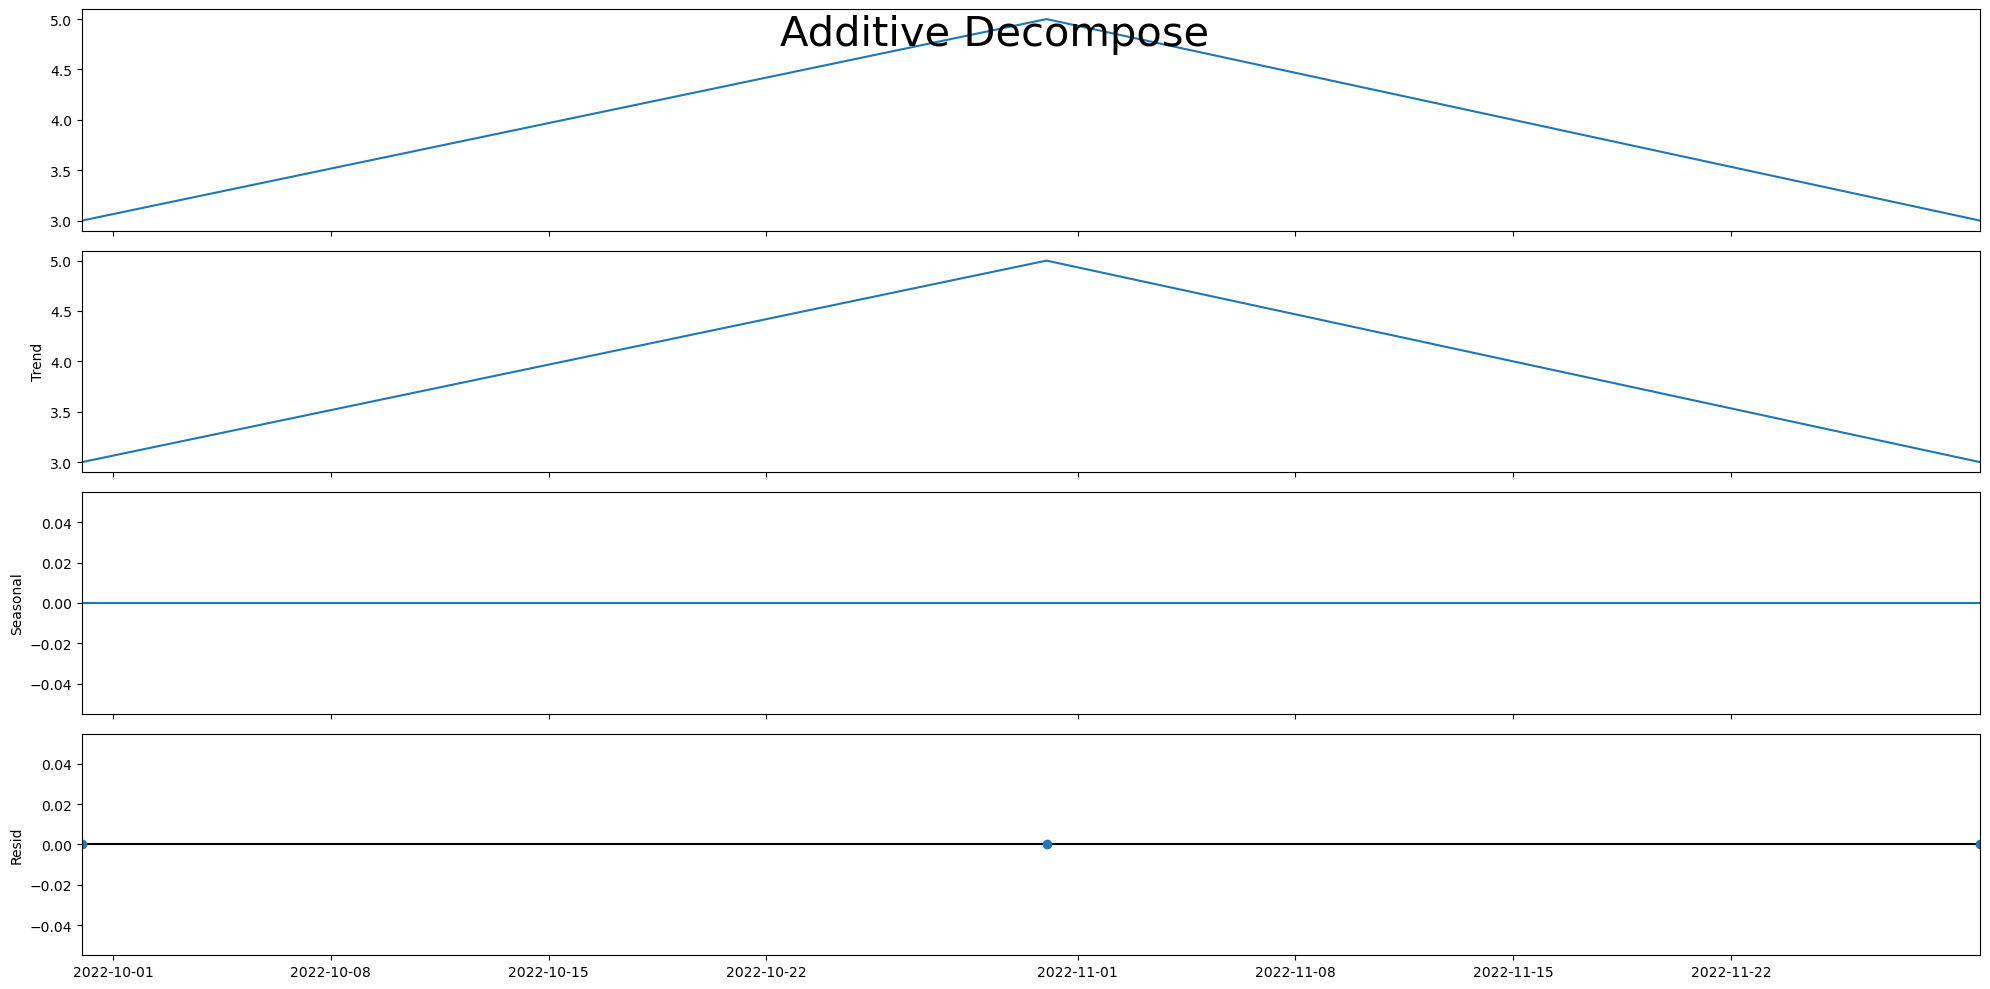

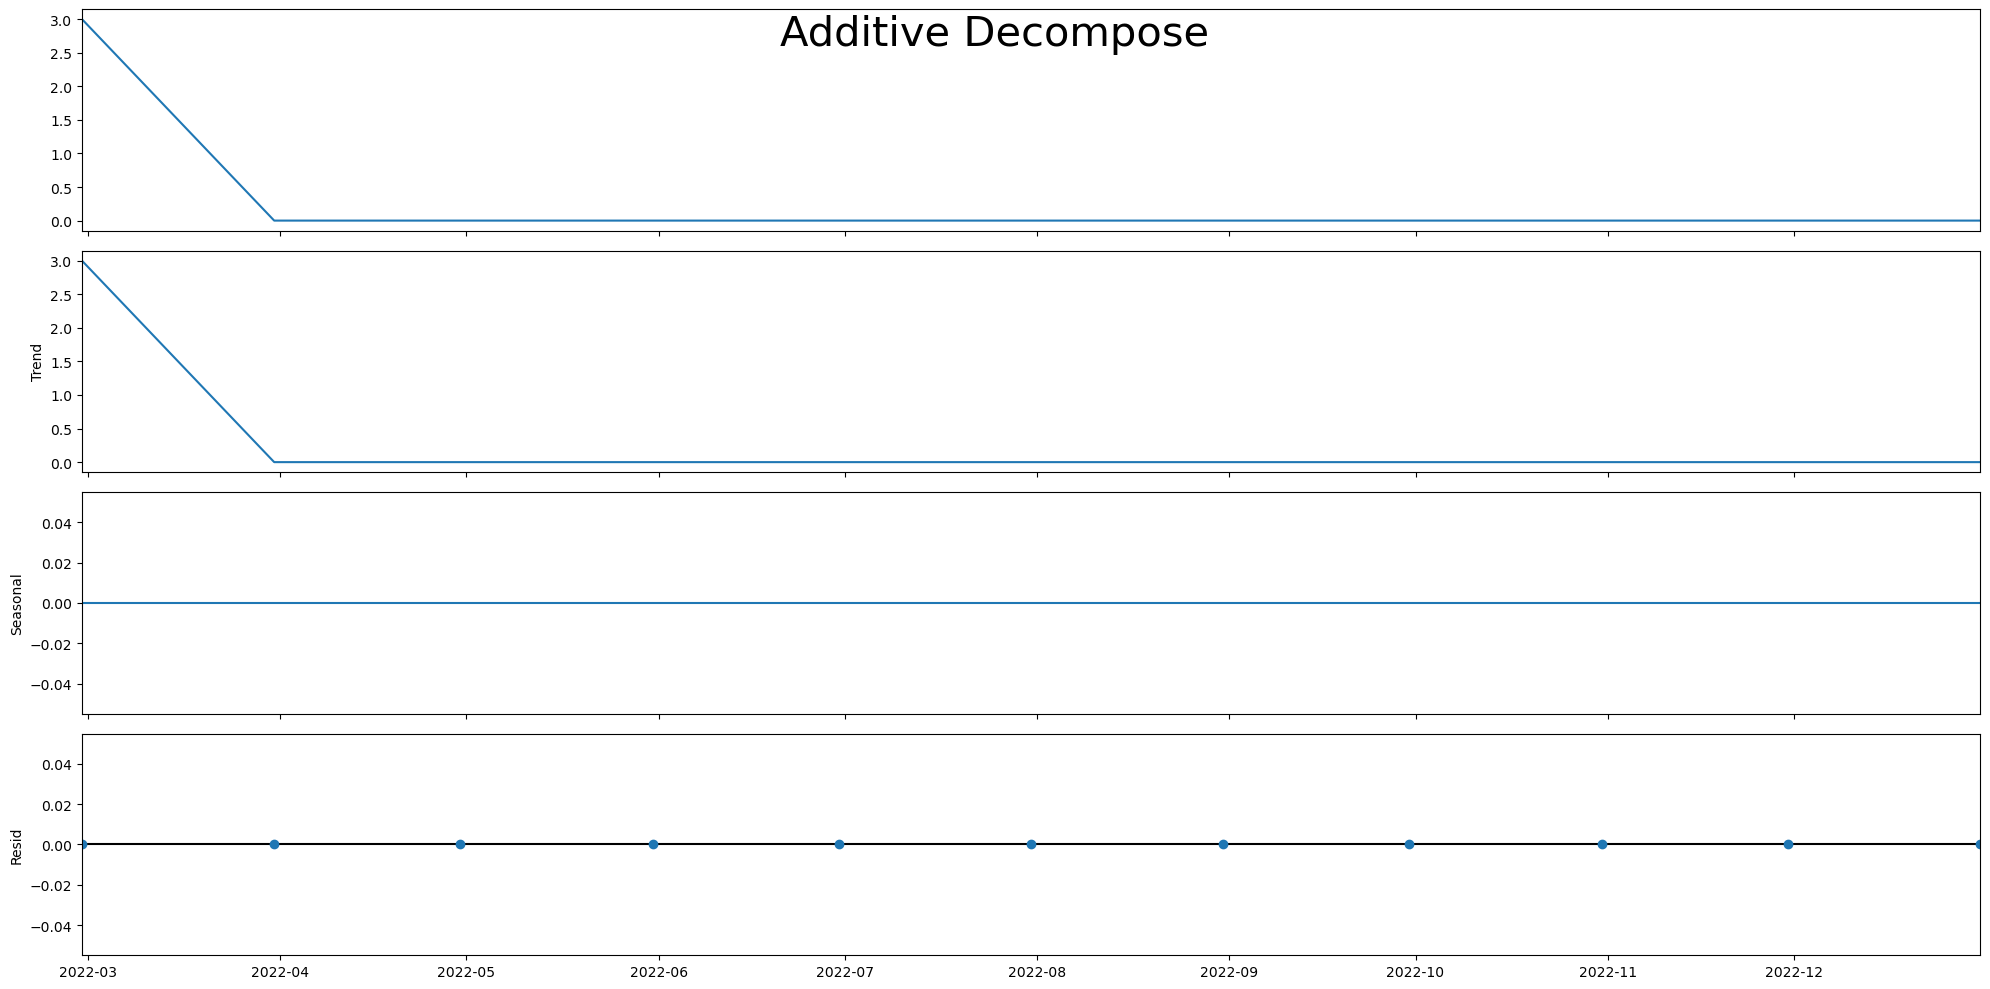

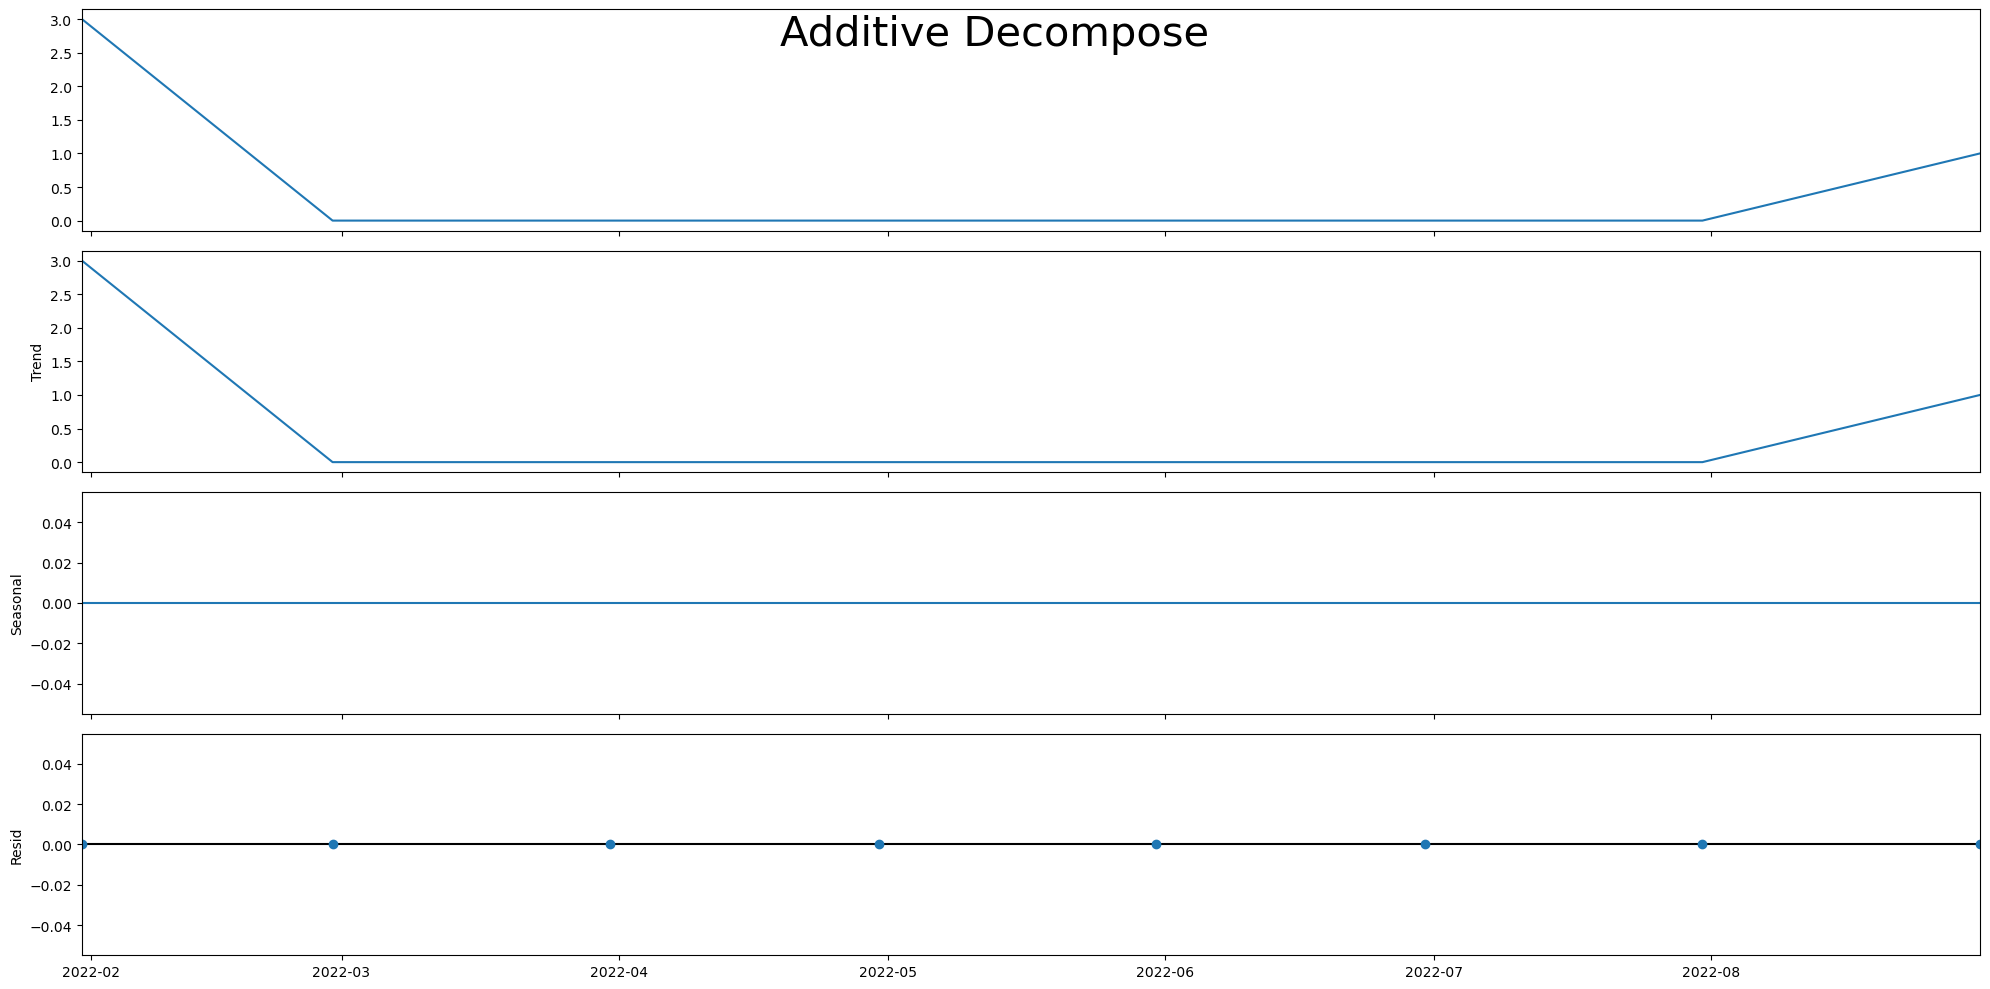

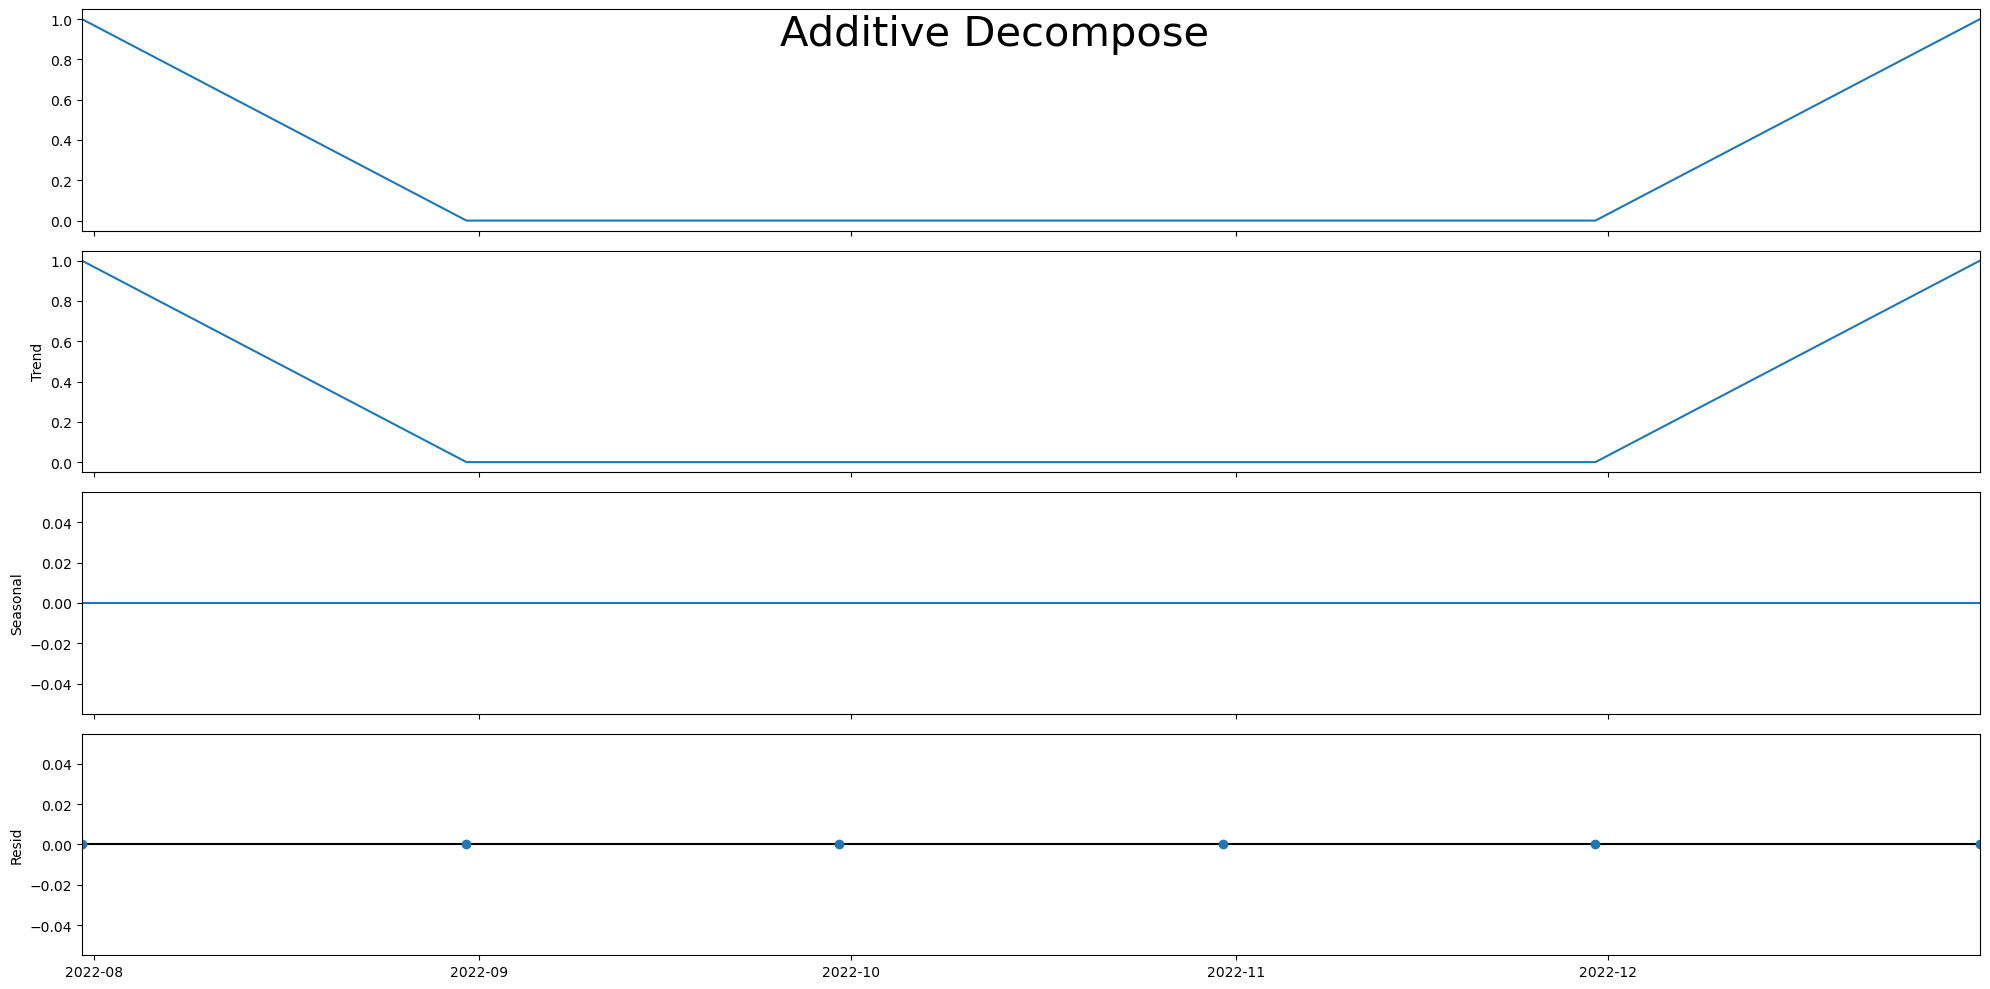

ValueError: x must have 2 complete cycles requires 2 observations. x only has 1 observation(s)

In [103]:
decompose(A)
decompose(A1)
decompose(A2)
decompose(A3)
decompose(A4)

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

IndexError: index 1 is out of bounds for axis 0 with size 1

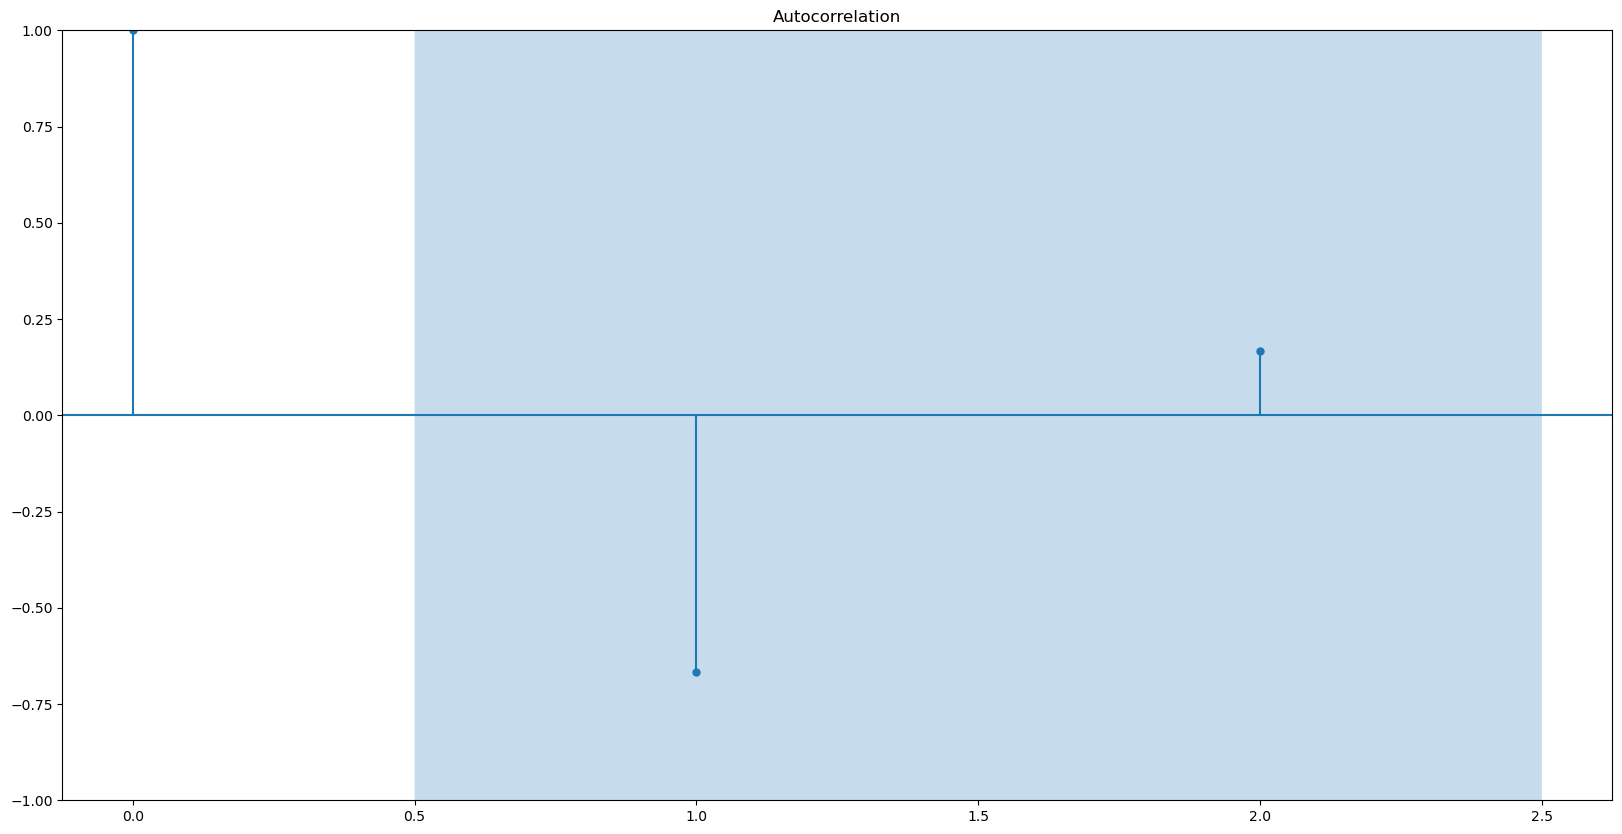

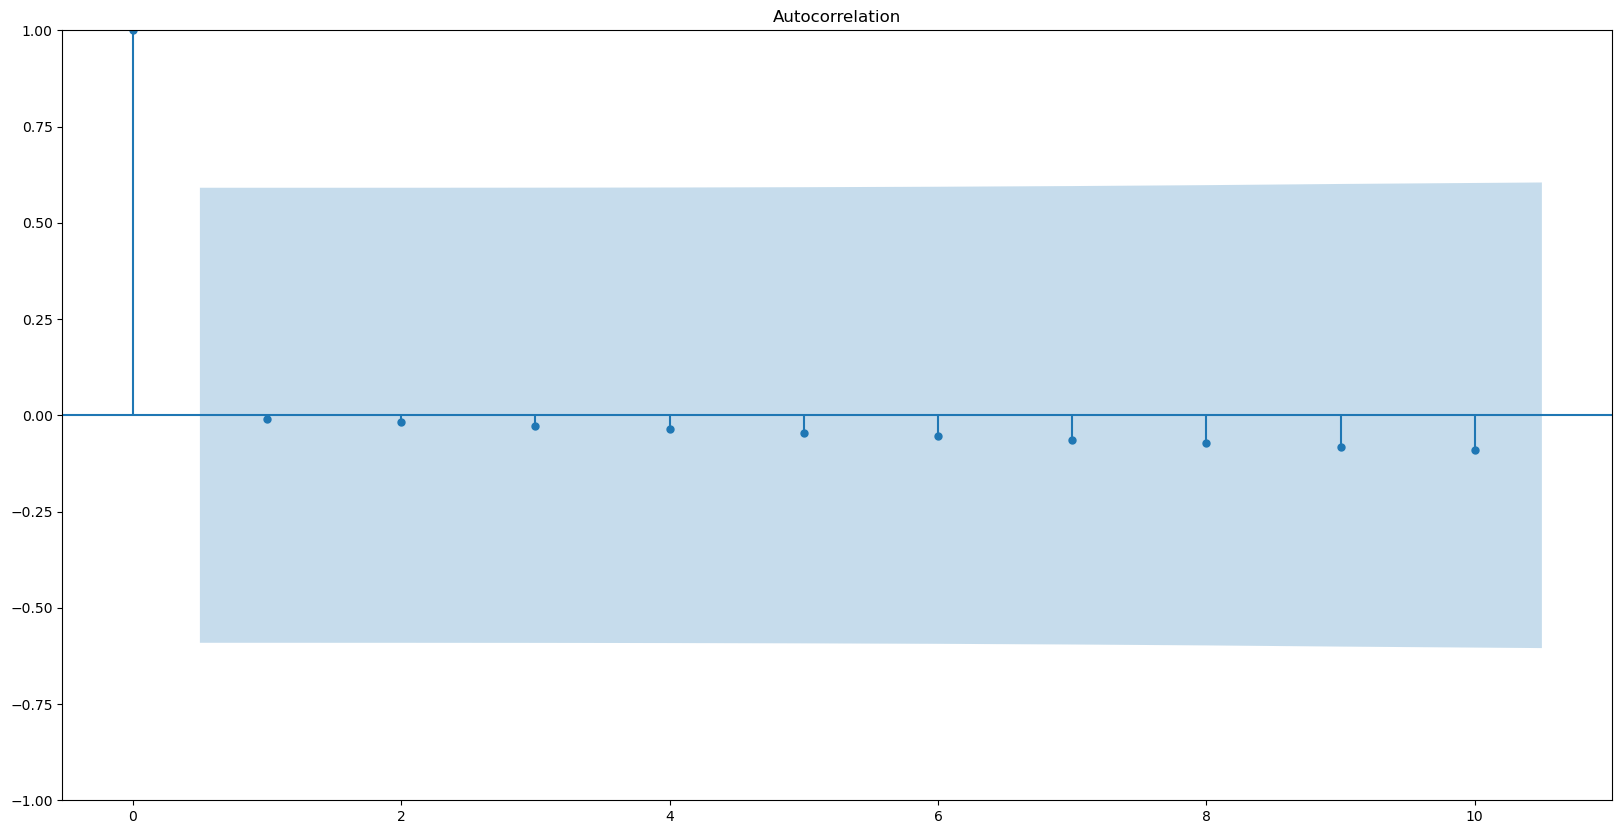

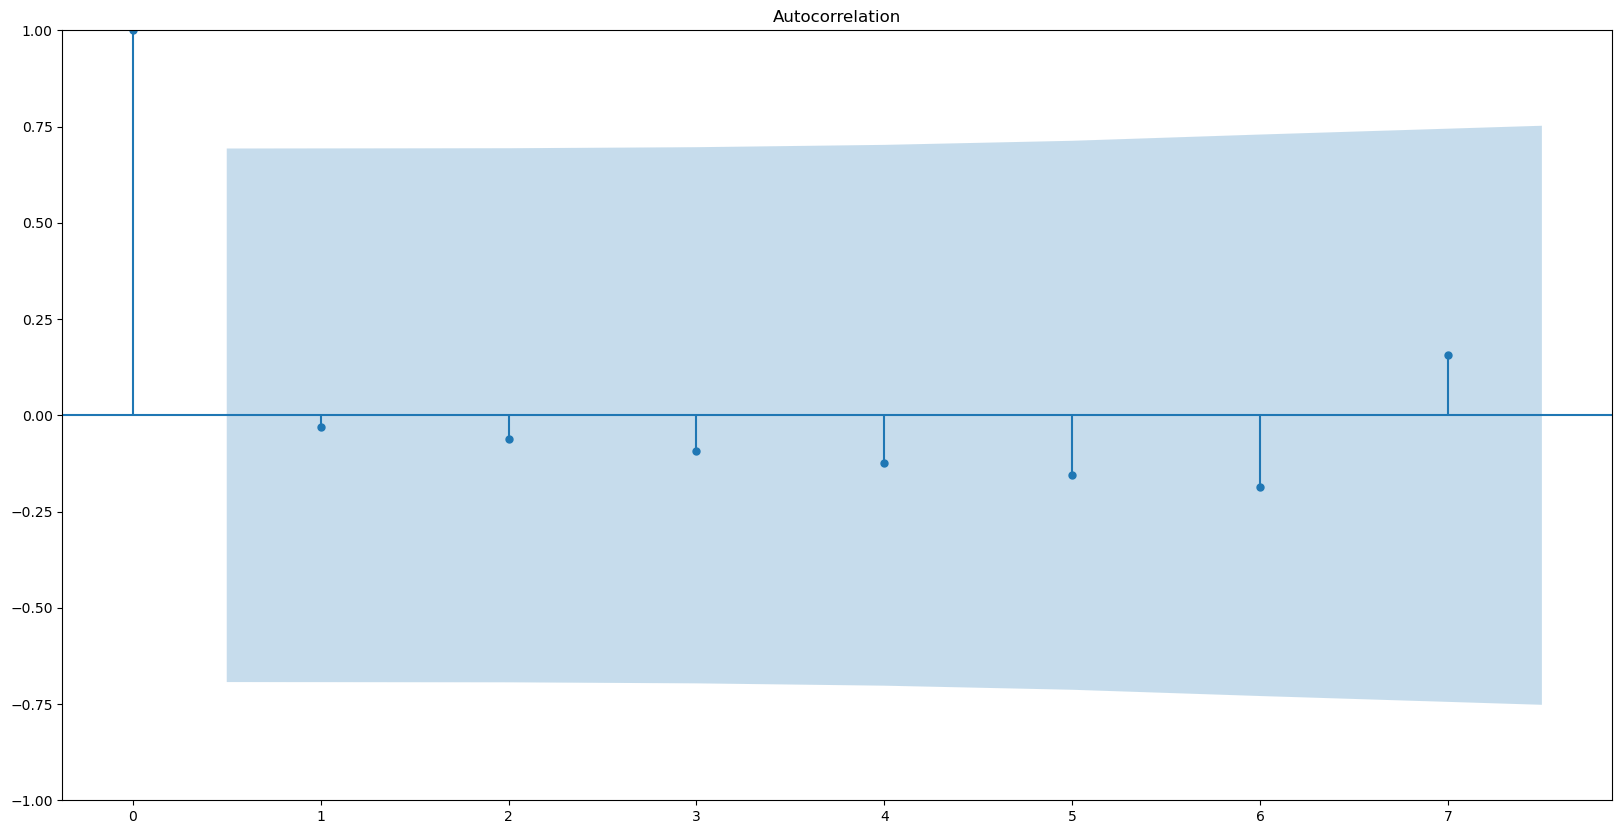

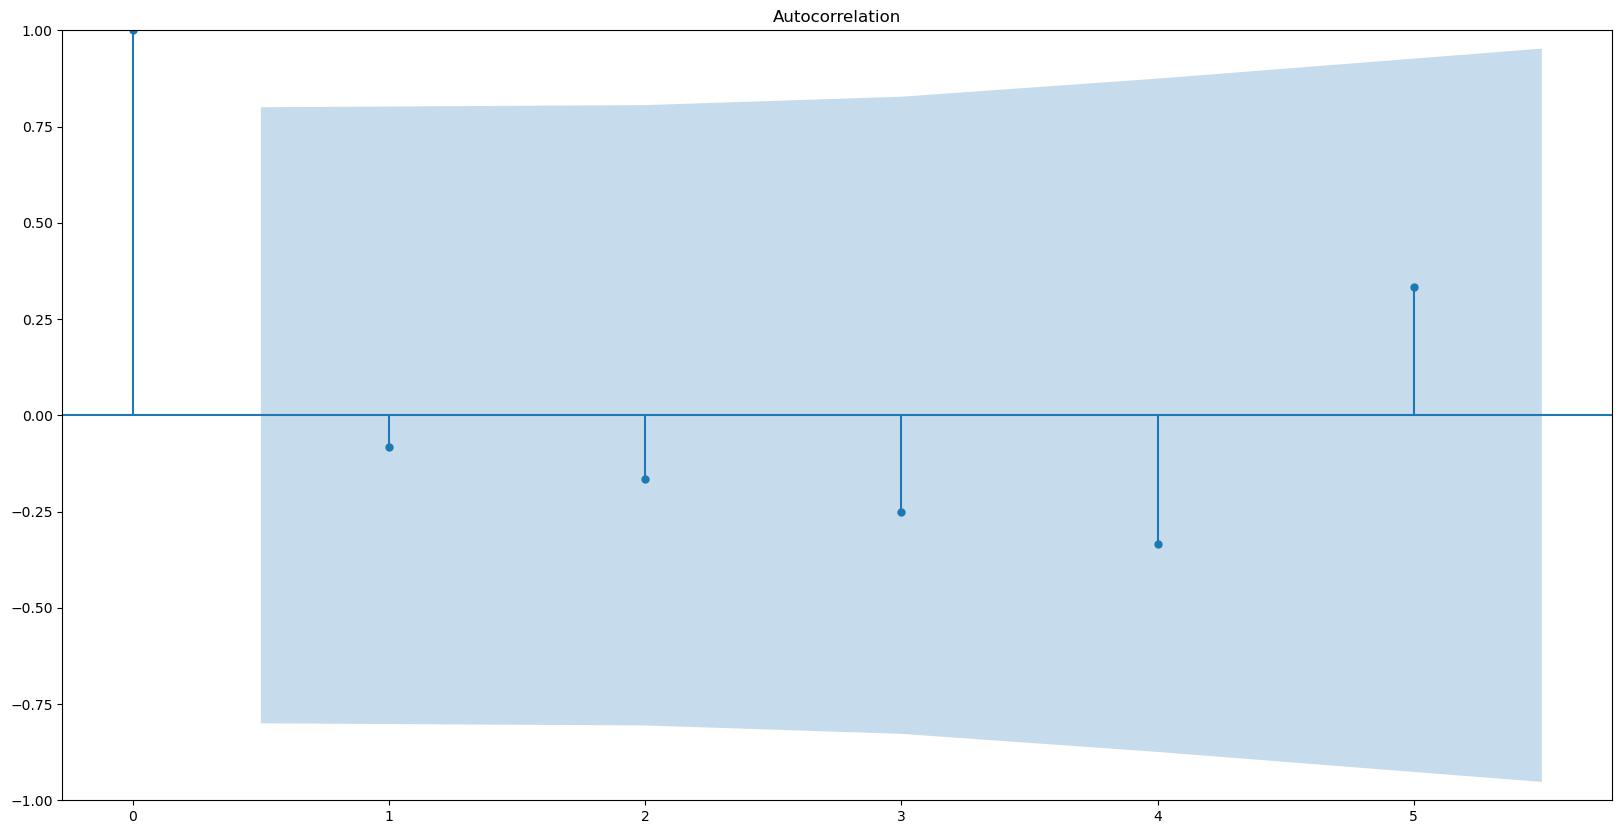

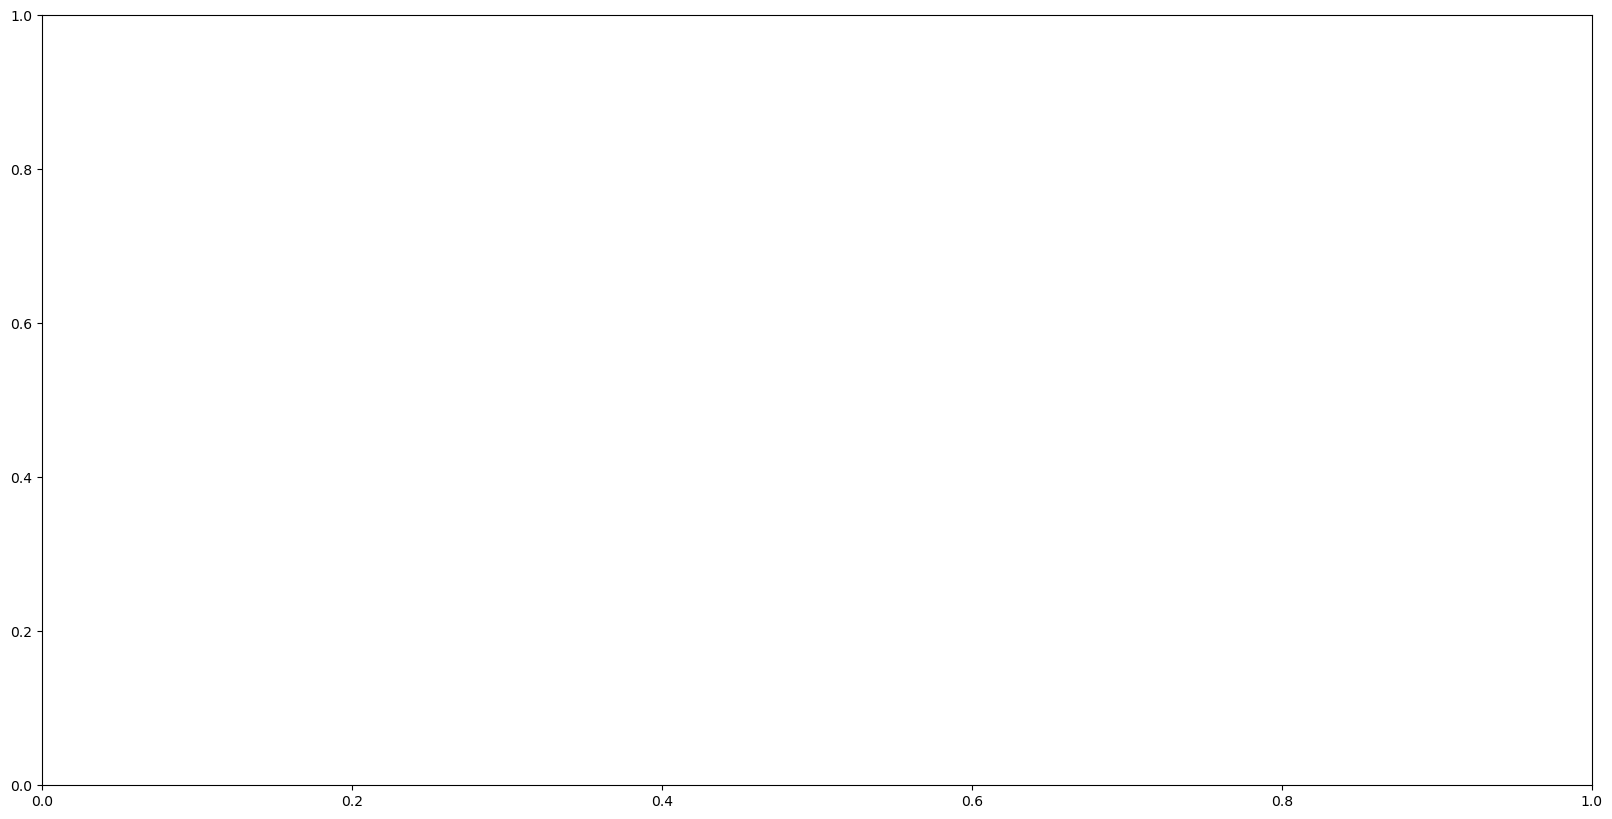

In [104]:
# ACF plots
plot_acf(A)  # 1
plot_acf(A1) # 4
plot_acf(A2)
plot_acf(A3)
plot_acf(A4)

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 3 must be < 1.

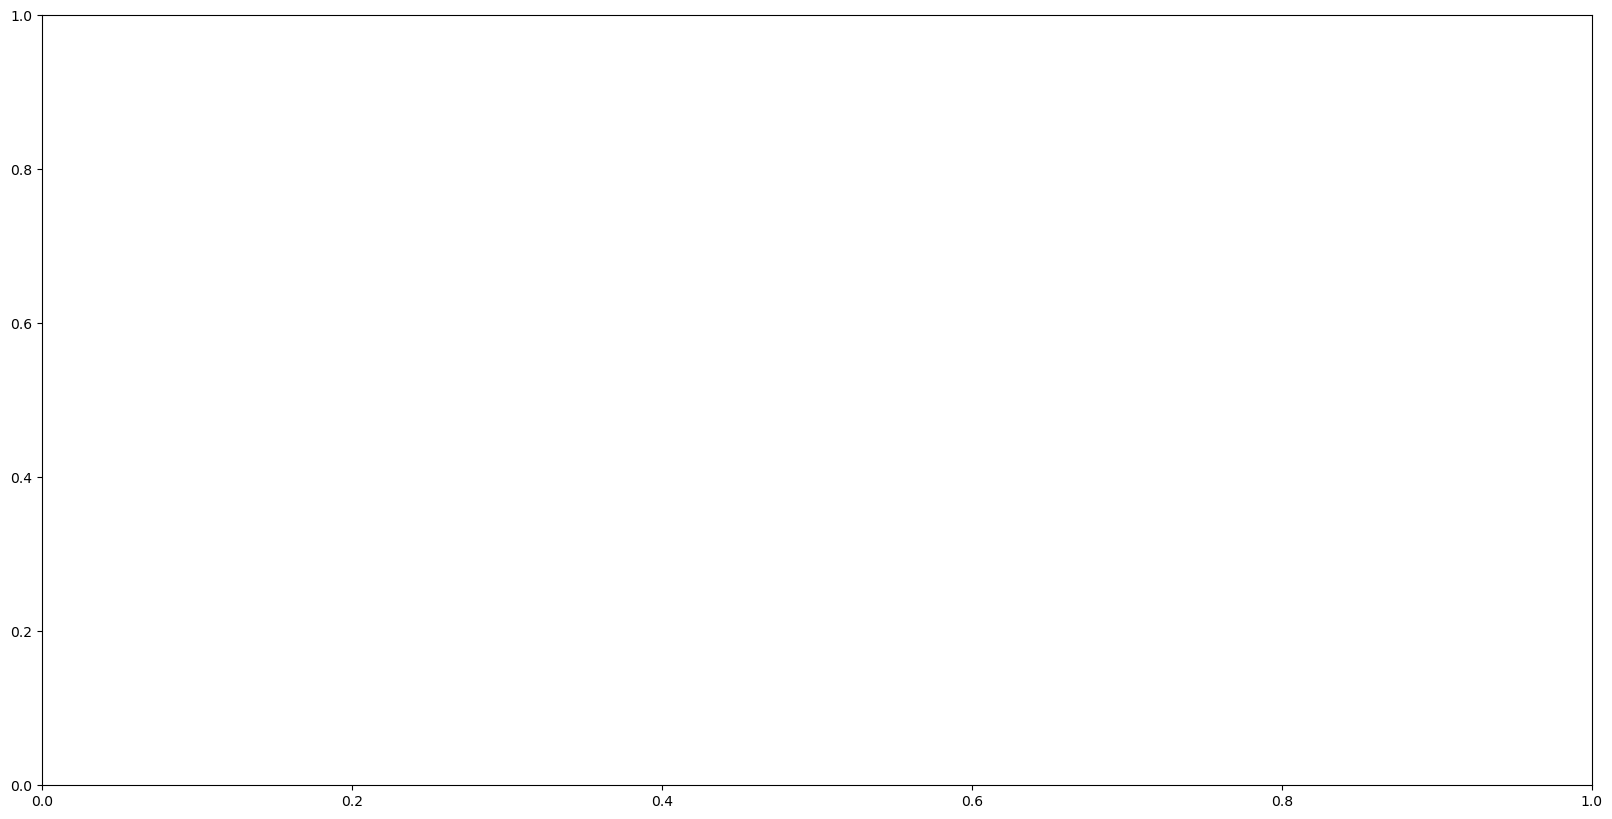

In [105]:
# pcf plots
plot_pacf(A , lags = 3)  # 1
plot_pacf(A1 , lags = 3) # 1
plot_pacf(A2 , lags = 3) # 1
plot_pacf(A3 , lags = 3) # 1
plot_pacf(A4 , lags = 3) # 1

In [106]:
# Creating a function to calculate the MAPE value for test data
def MAPE(pred, org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [107]:
# Auto Arima
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [40]:
pip install pmdarima

  Using cached pmdarima-2.0.3-cp311-cp311-win_amd64.whl (566 kB)
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/ea/8f/216de5d7bede3e26a7131b427a8aadade032f03f9c8ee88792def02e2cf4/Cython-3.0.2-cp311-cp311-win_amd64.whl.metadata
  Using cached Cython-3.0.2-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
Using cached Cython-3.0.2-cp311-cp311-win_amd64.whl (2.8 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [108]:
Am = auto_arima(A, suppress_warnings=True)
Am.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    3
Model:                        SARIMAX   Log Likelihood                  -4.080
Date:                Thu, 28 Sep 2023   AIC                             12.160
Time:                        15:14:07   BIC                             10.358
Sample:                    09-30-2022   HQIC                             8.536
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.6667      0.477      7.683      0.000       2.731       4.602
sigma2         0.8889      0.179      4.967      0.000       0.538       1.240
===================================================================================
Ljung-Box (L1) (Q):                   3.33   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.07   Prob(JB):                         0.77
Heteroskedasticity (H):                nan   Skew:                             0.71
Prob(H) (two-sided):                   nan   Kurtosis:                         1.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.02e+17. Standard errors may be unstable.
"""

In [109]:
Am1 = auto_arima(A1, suppress_warnings=True)
Am1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   11
Model:                        SARIMAX   Log Likelihood                 -14.505
Date:                Thu, 28 Sep 2023   AIC                             31.009
Time:                        15:14:26   BIC                             31.407
Sample:                    02-28-2022   HQIC                            30.758
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.8182      0.156      5.244      0.000       0.512       1.124
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                31.90
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             2.85
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
Am2 = auto_arima(A2, suppress_warnings=True)
Am2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    8
Model:                        SARIMAX   Log Likelihood                 -12.244
Date:                Thu, 28 Sep 2023   AIC                             26.488
Time:                        15:15:08   BIC                             26.568
Sample:                    01-31-2022   HQIC                            25.952
                         - 08-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.2500      0.375      3.335      0.001       0.515       1.985
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 5.94
Prob(Q):                              0.92   Prob(JB):                         0.05
Heteroskedasticity (H):               0.11   Skew:                             1.88
Prob(H) (two-sided):                  0.10   Kurtosis:                         4.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [111]:
Am3 = auto_arima(A3, suppress_warnings=True)
Am3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    6
Model:                        SARIMAX   Log Likelihood                  -4.001
Date:                Thu, 28 Sep 2023   AIC                             12.003
Time:                        15:15:12   BIC                             11.586
Sample:                    07-31-2022   HQIC                            10.336
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3333      0.123      2.706      0.007       0.092       0.575
sigma2         0.2222      0.092      2.406      0.016       0.041       0.403
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 1.06
Prob(Q):                              0.80   Prob(JB):                         0.59
Heteroskedasticity (H):               1.00   Skew:                             0.71
Prob(H) (two-sided):                  1.00   Kurtosis:                         1.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.27e+16. Standard errors may be unstable.
"""

In [112]:
Am4 = auto_arima(A4, suppress_warnings=True)
Am4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    1
Model:                        SARIMAX   Log Likelihood                  -4.415
Date:                Thu, 28 Sep 2023   AIC                             10.829
Time:                        15:15:15   BIC                              8.829
Sample:                             0   HQIC                              -inf
                                  - 1                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       400.0000    3.6e+18   1.11e-16      1.000   -7.06e+18    7.06e+18
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
MULTIPLE ELECTROLYTES 500ML IVF                              7
PARACETAMOL 1GM IV INJ                                       2
SODIUM CHLORIDE 0.9%                                         2
SODIUM CHLORIDE IVF 100ML                                    2
N-ACETYLCYSTEINE 1000MG/5ML INJ                              1

In [113]:
################
# MULTIPLE ELECTROLYTES 500ML IVF
Drug1=ARIMA(A,order=(1, 1, 12))
Drug1=Drug1.fit()
Drug1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:     MULTIPLE ELECTROLYTES 500ML IVF   No. Observations:                    3
Model:                             ARIMA(1, 1, 12)   Log Likelihood                   0.320
Date:                             Thu, 28 Sep 2023   AIC                             27.360
Time:                                     15:27:53   BIC                              9.064
Sample:                                 09-30-2022   HQIC                           -10.902
                                      - 11-30-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9976      0.007   -144.099      0.000      -1.011      -0.984
ma.L1         -2.5793   3.81e-07  -6.76e+06      0.000      -2.579      -2.579
ma.L2          2.5193   3.34e-07   7.54e+06      0.000       2.519       2.519
ma.L3         -1.8842   1.39e-07  -1.36e+07      0.000      -1.884      -1.884
ma.L4          2.0720   4.21e-10   4.92e+09      0.000       2.072       2.072
ma.L5         -1.0822   7.35e-07  -1.47e+06      0.000      -1.082      -1.082
ma.L6         -0.0313   1.56e-06     -2e+04      0.000      -0.031      -0.031
ma.L7         -1.1190   7.08e-07  -1.58e+06      0.000      -1.119      -1.119
ma.L8          2.0656   5.13e-09   4.02e+08      0.000       2.066       2.066
ma.L9         -1.8881   1.36e-07  -1.39e+07      0.000      -1.888      -1.888
ma.L10         2.5419   3.51e-07   7.24e+06      0.000       2.542       2.542
ma.L11        -2.5533   3.62e-07  -7.05e+06      0.000      -2.553      -2.553
ma.L12         0.9687   8.11e-07    1.2e+06      0.000       0.969       0.969
sigma2      1.996e-05   4.03e-05      0.495      0.621   -5.91e-05     9.9e-05
===================================================================================
Ljung-Box (L1) (Q):                   2.00   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.16   Prob(JB):                         0.85
Heteroskedasticity (H):                nan   Skew:                             0.00
Prob(H) (two-sided):                   nan   Kurtosis:                         1.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.31e+30. Standard errors may be unstable.
"""

<Axes: >

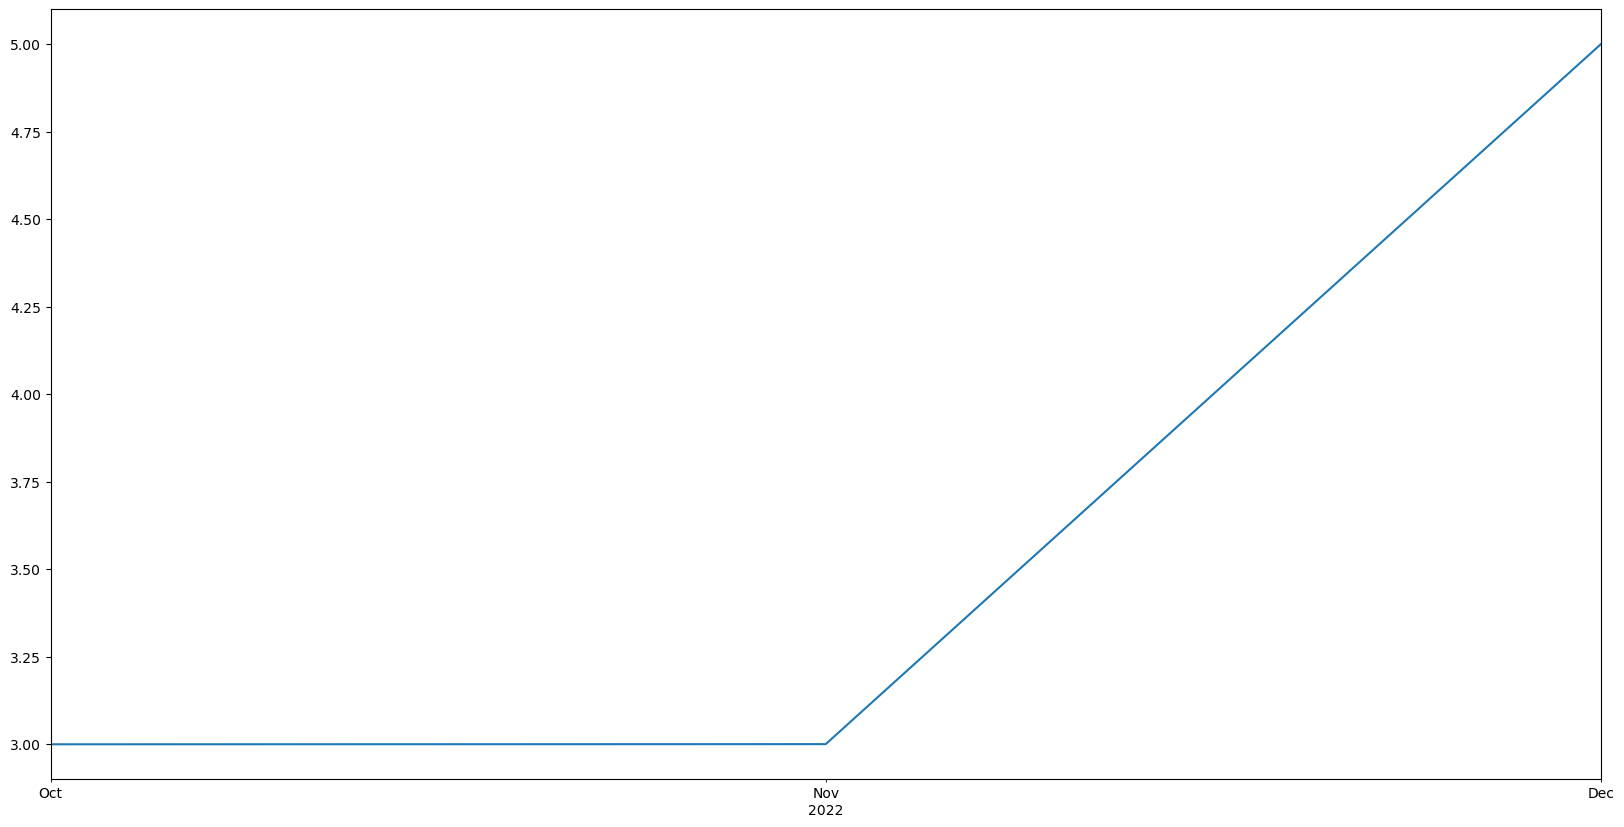

In [120]:
pred=Drug1.predict(start=1,end=3, typ='levels').rename('ARIMA predictions')
pred.plot()

In [121]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(A['MULTIPLE ELECTROLYTES 500ML IVF'], pred)


0.3554324464550748

In [122]:
predf=Drug1.predict(start=4,end=12,typ='levels').rename('ARIMA predictions')
predf
Drug1.save('drug_1.pkl')

In [145]:
# SODIUM CHLORIDE 0.9% #
Drug2 = ARIMA(A1,order=(1, 1, 1))
Drug2 = Drug2.fit()
Drug2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     SODIUM CHLORIDE 0.9%   No. Observations:                   11
Model:                   ARIMA(1, 1, 1)   Log Likelihood              -29713.761
Date:                  Thu, 28 Sep 2023   AIC                          59433.522
Time:                          16:18:55   BIC                          59434.430
Sample:                      02-28-2022   HQIC                         59432.526
                           - 12-31-2022                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       4.308e-07   1.33e-18   3.25e+11      0.000    4.31e-07    4.31e-07
ma.L1       4.308e-07   1.33e-18   3.25e+11      0.000    4.31e-07    4.31e-07
sigma2         0.0002   5.08e-09   2.97e+04      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                22.74
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -2.67
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.58e+35. Standard errors may be unstable.
"""

<Axes: >

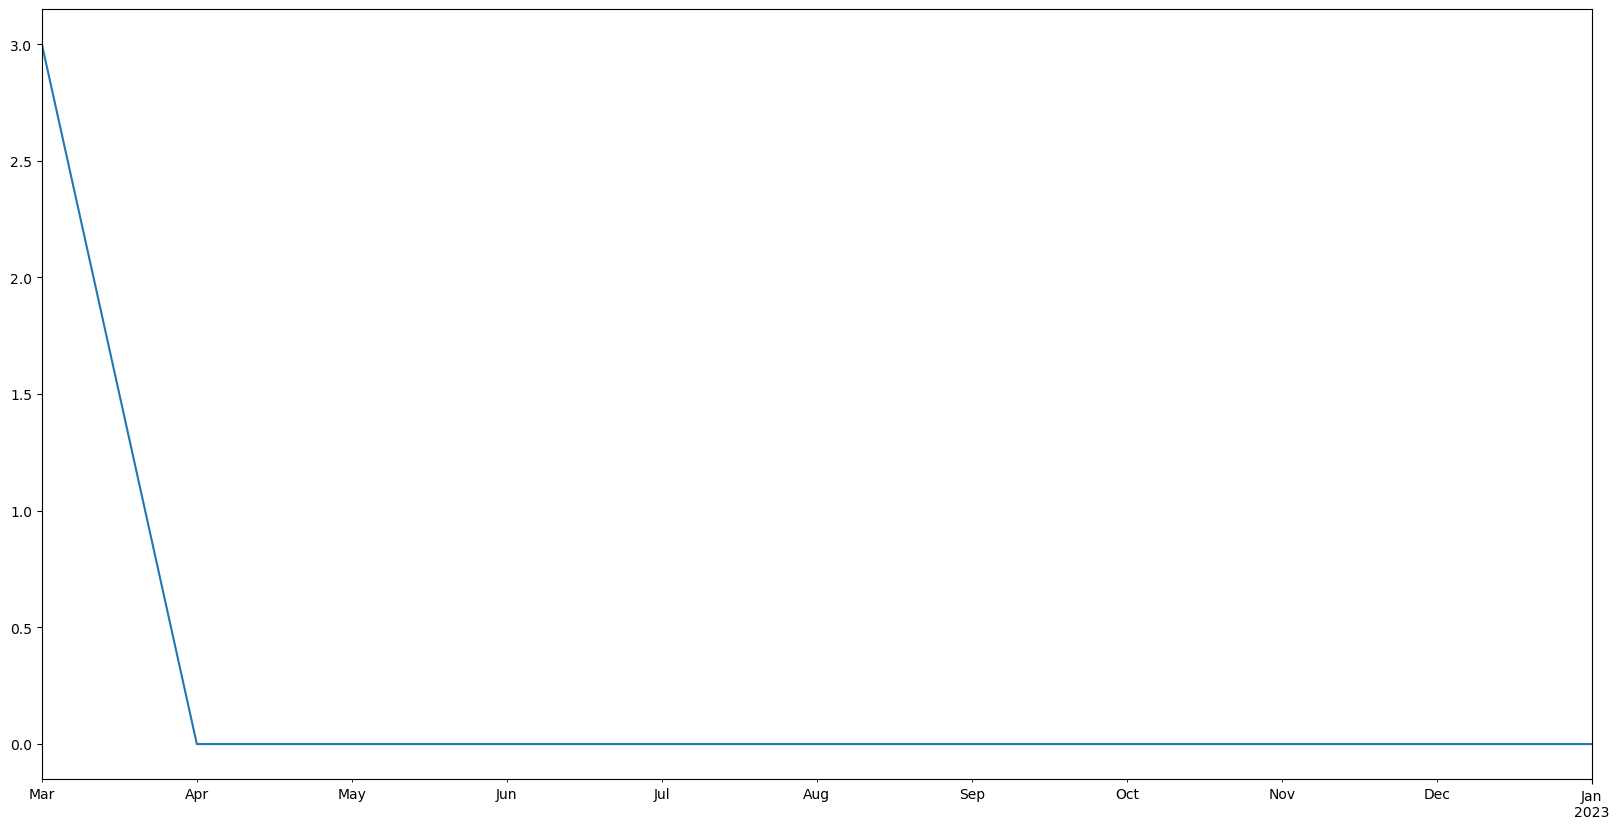

In [146]:
pred=Drug2.predict(start=1,end=11, typ='levels').rename('ARIMA predictions')
pred.plot()

In [147]:
mean_absolute_percentage_error(A1['SODIUM CHLORIDE 0.9%'], pred)


1058304348.8726292

In [148]:
predf=Drug2.predict(start=11,end=24,typ='levels').rename('ARIMA predictions')
predf
Drug2.save('drug_2.pkl')

In [151]:
# SODIUM CHLORIDE IVF 100ML #
Drug3 = ARIMA(A2,order=(1, 1, 12))
Drug3 = Drug3.fit()
Drug3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     SODIUM CHLORIDE IVF 100ML   No. Observations:                    8
Model:                       ARIMA(1, 1, 12)   Log Likelihood                 -10.743
Date:                       Thu, 28 Sep 2023   AIC                             49.486
Time:                               16:21:14   BIC                             48.729
Sample:                           01-31-2022   HQIC                            40.126
                                - 08-31-2022                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       1.959e-05   1.55e+05   1.26e-10      1.000   -3.04e+05    3.04e+05
ma.L1      -2.117e-05   1.08e+05  -1.97e-10      1.000   -2.11e+05    2.11e+05
ma.L2      -5.884e-06    5.2e+04  -1.13e-10      1.000   -1.02e+05    1.02e+05
ma.L3      -3.753e-06    5.4e+05  -6.95e-12      1.000   -1.06e+06    1.06e+06
ma.L4      -1.612e-05   3.23e+04  -4.99e-10      1.000   -6.33e+04    6.33e+04
ma.L5      -6.236e-06   6.73e+05  -9.26e-12      1.000   -1.32e+06    1.32e+06
ma.L6         -0.4182   6.06e+04   -6.9e-06      1.000   -1.19e+05    1.19e+05
ma.L7       1.415e-06   1.05e+05   1.35e-11      1.000   -2.06e+05    2.06e+05
ma.L8      -1.222e-05   2.56e+04  -4.78e-10      1.000   -5.02e+04    5.02e+04
ma.L9      -8.663e-06   2.98e+05  -2.91e-11      1.000   -5.83e+05    5.83e+05
ma.L10     -1.664e-05    1.8e+04  -9.26e-10      1.000   -3.52e+04    3.52e+04
ma.L11     -1.416e-05   3.17e+05  -4.46e-11      1.000   -6.22e+05    6.22e+05
ma.L12         0.0976   3.54e+04   2.76e-06      1.000   -6.93e+04    6.93e+04
sigma2         1.0893    5.3e+04   2.06e-05      1.000   -1.04e+05    1.04e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 6.12
Prob(Q):                              0.93   Prob(JB):                         0.05
Heteroskedasticity (H):               0.00   Skew:                            -2.03
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.54e+19. Standard errors may be unstable.
"""

<Axes: >

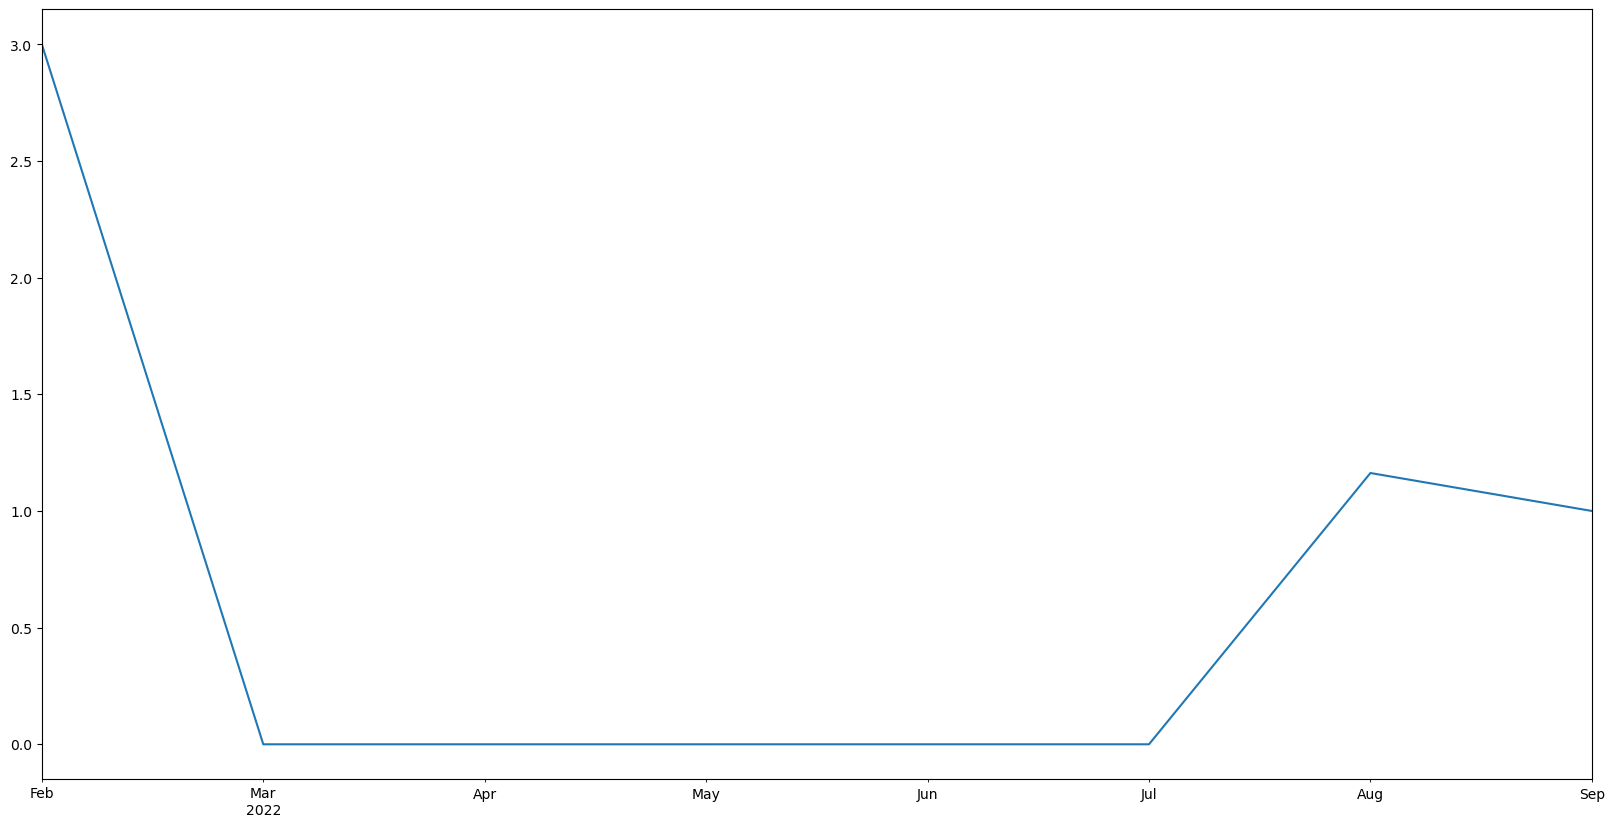

In [154]:
pred=Drug3.predict(start=1,end=8, typ='levels').rename('ARIMA predictions')
pred.plot()

In [155]:
mean_absolute_percentage_error(A2['SODIUM CHLORIDE IVF 100ML'], pred)

654537668955506.5

In [156]:
predf=Drug3.predict(start=11,end=24,typ='levels').rename('ARIMA predictions')
predf
Drug3.save('drug_3.pkl')

In [157]:
# PARACETAMOL 1GM IV INJ #
Drug4 = ARIMA(A3,order=(1, 1, 12))
Drug4 = Drug4.fit()
Drug4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     PARACETAMOL 1GM IV INJ   No. Observations:                    6
Model:                    ARIMA(1, 1, 12)   Log Likelihood                  -2.791
Date:                    Thu, 28 Sep 2023   AIC                             33.581
Time:                            16:35:06   BIC                             28.113
Sample:                        07-31-2022   HQIC                            18.906
                             - 12-31-2022                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0012   2035.306   5.71e-07      1.000   -3989.126    3989.128
ma.L1         -0.0006   8490.079  -6.65e-08      1.000   -1.66e+04    1.66e+04
ma.L2      -1.934e-05     28.073  -6.89e-07      1.000     -55.023      55.023
ma.L3          0.0005   3774.277   1.24e-07      1.000   -7397.447    7397.448
ma.L4         -1.6128    313.334     -0.005      0.996    -615.737     612.511
ma.L5          0.0010   2847.745   3.47e-07      1.000   -5581.477    5581.479
ma.L6       2.386e-05      0.460   5.19e-05      1.000      -0.901       0.901
ma.L7         -0.0010   3041.816  -3.32e-07      1.000   -5961.851    5961.849
ma.L8          1.6031    383.463      0.004      0.997    -749.971     753.177
ma.L9         -0.0004   3809.884  -1.12e-07      1.000   -7467.235    7467.234
ma.L10     -4.014e-06     28.501  -1.41e-07      1.000     -55.862      55.862
ma.L11         0.0005   8483.389    6.3e-08      1.000   -1.66e+04    1.66e+04
ma.L12        -0.9888    159.619     -0.006      0.995    -313.837     311.860
sigma2         0.0309      2.313      0.013      0.989      -4.502       4.564
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.18
Prob(Q):                              0.96   Prob(JB):                         0.56
Heteroskedasticity (H):               0.11   Skew:                            -1.19
Prob(H) (two-sided):                  0.19   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.72e+24. Standard errors may be unstable.
"""

<Axes: >

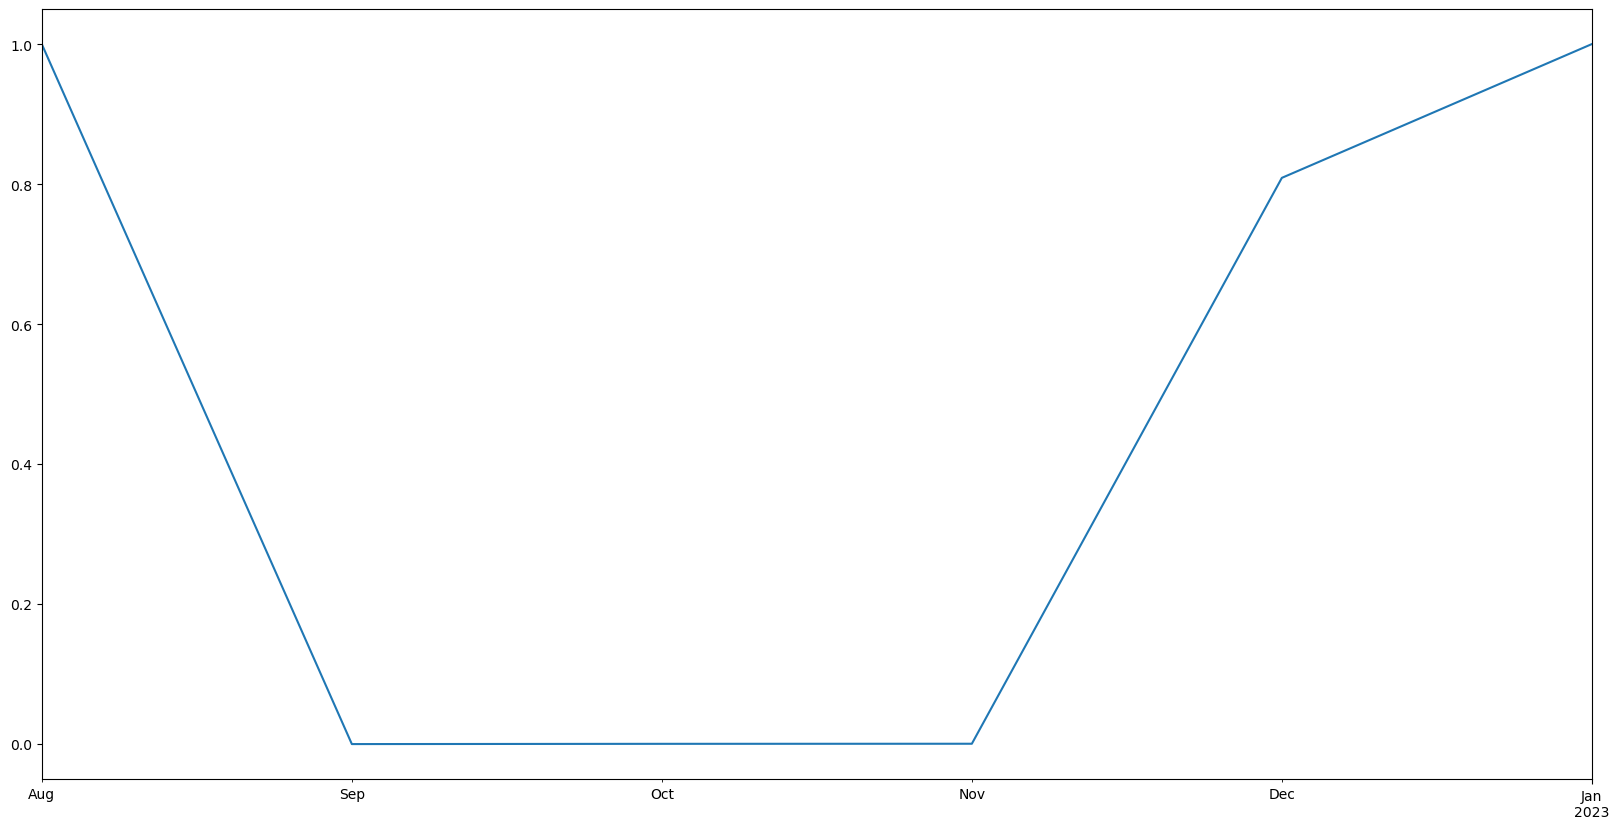

In [160]:
pred=Drug4.predict(start=1,end=6, typ='levels').rename('ARIMA predictions')
pred.plot()

In [161]:
mean_absolute_percentage_error(A3['PARACETAMOL 1GM IV INJ'], pred)

607600348286030.2

In [163]:
predf=Drug4.predict(start=11,end=24,typ='levels').rename('ARIMA predictions')
predf
Drug4.save('drug_4.pkl')

In [164]:
import statsmodels.api as sm
model1 = sm.load('drug_1.pkl')
model2 = sm.load('drug_2.pkl')
model3 = sm.load('drug_3.pkl')
model4 = sm.load('drug_4.pkl')

In [165]:
predf1=model1.predict(start=12,end=24).rename('ARIMA predictions')
predf1

2023-09-30    3.015646
2023-10-31    4.981744
2023-11-30    3.020418
2023-12-31    4.976974
2024-01-31    3.025176
2024-02-29    4.972228
2024-03-31    3.029911
2024-04-30    4.967504
2024-05-31    3.034623
2024-06-30    4.962803
2024-07-31    3.039313
2024-08-31    4.958125
2024-09-30    3.043979
Freq: M, Name: ARIMA predictions, dtype: float64

In [166]:
predf2=model2.predict(start=12,end=24).rename('ARIMA predictions')
predf2

2023-02-28    2.018076e-63
2023-03-31    2.018076e-63
2023-04-30    2.018076e-63
2023-05-31    2.018076e-63
2023-06-30    2.018076e-63
2023-07-31    2.018076e-63
2023-08-31    2.018076e-63
2023-09-30    2.018076e-63
2023-10-31    2.018076e-63
2023-11-30    2.018076e-63
2023-12-31    2.018076e-63
2024-01-31    2.018076e-63
2024-02-29    2.018076e-63
Freq: M, Name: ARIMA predictions, dtype: float64

In [167]:
predf3=model3.predict(start=12,end=24).rename('ARIMA predictions')
predf3

2023-01-31    1.000163
2023-02-28    0.820948
2023-03-31    0.820945
2023-04-30    0.820948
2023-05-31    0.820949
2023-06-30    0.820951
2023-07-31    0.820953
2023-08-31    0.805177
2023-09-30    0.805176
2023-10-31    0.805176
2023-11-30    0.805176
2023-12-31    0.805176
2024-01-31    0.805176
Freq: M, Name: ARIMA predictions, dtype: float64

In [168]:
predf4=model4.predict(start=12,end=24).rename('ARIMA predictions')
predf4

2023-07-31    0.305427
2023-08-31    0.629169
2023-09-30    0.629440
2023-10-31    0.629441
2023-11-30    0.629473
2023-12-31    0.553011
2024-01-31    0.552922
2024-02-29    0.552922
2024-03-31    0.552922
2024-04-30    0.552922
2024-05-31    0.552922
2024-06-30    0.552922
2024-07-31    0.552922
Freq: M, Name: ARIMA predictions, dtype: float64